# Tools

## Data preprocessing

Load a month of monthly Neighborhood Patterns, then prepare data for IPF.

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

import logging
# Create a logger
logger_name = 'all_logger'
logger = logging.getLogger(logger_name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load monthly Neighborhood Patterns

#### Asign file locations

In [8]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo

# Dell desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # 2018 desktop
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel'  # 2018 desktop
# # data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
# data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# # home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# # https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
# # CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"


# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# 2018 desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # 2018 desktop
save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018'  # 2018 desktop
# data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
data_dir = r'D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns'    
ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"


os.makedirs(save_dir, exist_ok=True)

# save_file = False
save_file = True


year = '2019'
month = 7




month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'




print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Month directory: D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns\2019\07\01
Save_dir directory: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018
ACS_file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz
No dict colum file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\NP_dict_column_2019_07.csv
Device home areas file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\NP_split_device_home_areas_2019_07.csv
Device person_per_device file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc

## Load monthly neighborhood patterns

In [9]:

month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], start_str="N", use_cols=use_cols, verbose=True)
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
month_df = month_df[use_cols]
month_df

AREA                                  DEVICE_HOME_AREAS  \
1468   010010201001  {"010010208012":87,"010010205002":86,"01001020...   
4561   010010201002  {"010010201002":123,"010010205002":34,"0100102...   
7886   010010202001  {"010010202001":88,"010010205002":56,"01001020...   
12665  010010202002  {"010010205002":308,"010010208012":196,"010010...   
3324   010010203001  {"010010203001":287,"010010208022":97,"0100102...   
...             ...                                                ...   
13970  560459511002  {"560459511002":136,"560459513002":50,"5604595...   
19006  560459513001  {"560459513001":101,"560459513002":70,"5604595...   
18088  560459513002  {"560459513002":126,"560459511002":90,"5604595...   
2397   560459513003  {"560459513003":95,"560459511002":73,"56045951...   
5251   780309900000                                                 {}   

                                            STOPS_BY_DAY  RAW_STOP_COUNTS  \
1468   [241,251,265,316,200,214,210,326,246,256,267,2...             7400   
4561   [203,208,213,237,216,200,258,230,191,230,187,1...             6381   
7886   [175,175,185,221,157,178,171,204,204,166,193,1...             5772   
12665  [744,844,984,1435,596,640,700,833,918,875,848,...            25892   
3324   [428,443,488,479,472,509,512,563,497,519,516,5...            15111   
...                                                  ...              ...   
13970  [235,300,362,268,245,259,256,350,354,405,327,3...             8702   
19006  [324,265,251,247,201,167,214,288,304,313,276,2...             7692   
18088  [559,541,593,571,495,412,470,508,468,502,467,5...            14240   
2397   [245,232,269,212,189,146,174,212,257,267,262,2...             7435   
5251   [0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                4   

       RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
1468                1815     34.416667   
4561                 782    177.300000   
7886                1054     71.850000   
12665               6132     20.366667   
3324                1954    113.066667   
...                  ...           ...   
13970               1182     45.083333   
19006                731     27.750000   
18088               2343     20.533333   
2397                 839     29.983333   
5251                   4     43.383333   

                                      STOPS_BY_EACH_HOUR  
1468   [0,8,3,0,0,3,3,10,9,12,10,12,14,14,16,17,20,16...  
4561   [4,2,2,1,0,2,4,3,10,4,7,6,11,7,15,9,18,30,18,1...  
7886   [2,3,3,2,2,0,1,3,12,4,12,18,9,3,9,5,13,18,14,1...  
12665  [3,0,2,3,9,4,14,44,40,52,47,55,71,61,44,45,54,...  
3324   [4,2,4,2,5,4,5,20,11,23,9,27,22,23,23,35,29,48...  
...                                                  ...  
13970  [4,0,0,0,0,2,3,8,12,15,14,15,16,9,20,11,16,17,...  
19006  [3,7,6,6,7,11,15,8,21,17,13,20,27,18,18,16,25,...  
18088  [3,2,4,5,4,10,13,21,32,38,31,38,45,41,54,35,36...  
2397   [1,5,2,1,4,3,10,10,13,13,8,7,21,20,17,23,16,20...  
5251   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  

[217732 rows x 7 columns]

In [10]:
print("RAW_STOP_COUNTS (billion):", month_df['RAW_STOP_COUNTS'].sum() / 1000000000)

RAW_STOP_COUNTS (billion): 3.377052491


## Check the total of the hourly stops

Usually are 98.9% of the sum of STOPS_BY_EACH_HOUR column

In [11]:
def _get_total_hourly_stop(row):
    # print(row)
    hourly_stop = json.loads(row['STOPS_BY_EACH_HOUR'])
    total_stop = sum(hourly_stop)
    return total_stop

month_df['total_hourly_stop'] = month_df.iloc[:].apply(_get_total_hourly_stop, axis=1)
ratio = month_df['total_hourly_stop'].sum() / month_df['RAW_STOP_COUNTS'].sum()

print("Ratio: total_hourly_stop / RAW_STOP_COUNTS = ", ratio)

# the total_hourly_stop is smaller than the RAW_STOP_COUNTS (98.9%)

Ratio: total_hourly_stop / RAW_STOP_COUNTS =  1.0


## Adjust the RAW_STOP_COUNTS by dwellling_time

If a stop dwelling > 60 minutes, we add a stop to the next hours. 

In [12]:
non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
print("sum of non_adjusted_dwell_time_stop_CBG_arr (billion):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

month_df['adjusted_raw_stop'] = adjusted_dwell_time_stop_CBG_arr.sum(axis=1)
month_df[['adjusted_raw_stop', 'RAW_STOP_COUNTS']].sum() / 1000000000

print("sum of adjusted_dwell_time_stop_CBG_arr (billion):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("sum of adjusted_dwell_time_stop_national_arr (billion):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000000)
print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

sum of non_adjusted_dwell_time_stop_CBG_arr (billion): 3.377052491
shape of non_adjusted_dwell_time_stop_CBG_arr: (217732, 744)
sum of adjusted_dwell_time_stop_CBG_arr (billion): 3.96572017
sum of adjusted_dwell_time_stop_national_arr (billion): 3.96572017
shape of adjusted_dwell_time_stop_CBG_arr: (217732, 744)


In [13]:
# month_df

###　Save adjusted  RAW_STOP_COUNTS 

In [14]:
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = month_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')

# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       8       3       0       0       3       3   
1       010010201002      12       9       8       5       3       3       6   
2       010010202001       6       5       6       5       4       2       1   
3       010010202002       3       0       2       3       9       4      14   
4       010010203001      16       6       6       6       7       9       9   
...              ...     ...     ...     ...     ...     ...     ...     ...   
217727  560459511002       4       0       0       0       0       2       3   
217728  560459513001       3       7       6       6       7      11      15   
217729  560459513002       3       2       4       5       4      10      13   
217730  560459513003       1       5       2       1       4       3      10   
217731  780309900000       0       0       0       0       0       0       0   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0           10       9       12       10       12       14       14       16   
1            9      17       17       21       17       24       24       33   
2            4      15       16       16       30       27       12       12   
3           44      40       52       47       55       71       61       44   
4           25      31       34       32       36       49       45       46   
...        ...     ...      ...      ...      ...      ...      ...      ...   
217727       8      12       15       14       15       16        9       20   
217728       8      21       17       13       20       27       18       18   
217729      21      32       38       31       38       45       41       54   
217730      10      13       13        8        7       21       20       17   
217731       0       0        0        0        0        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0            17       20       16       24       16       12       13   
1            31       42       57       66       67       52       42   
2            14       18       31       32       27       27       19   
3            45       54       50       37       44       32       11   
4            58       64       77       75       63       71       49   
...         ...      ...      ...      ...      ...      ...      ...   
217727       11       16       17       10       14       21       16   
217728       16       25       22        8       10       19       12   
217729       35       36       23       34       17       23       25   
217730       23       16       20       14        6       12        8   
217731        0        0        0        0        0        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0             5        4        2        2        0        0        1   
1            27       16       15       15       14        9        9   
2            10       10        9        6        5        4        3   
3            11       11        7        5        4        5        4   
4            25       20       18       13        6        3        2   
...         ...      ...      ...      ...      ...      ...      ...   
217727        5        7        2        2        1        3        1   
217728       10        5        1        3        2        4        1   
217729       16        9        6        3        5        9        4   
217730        6        5        7        2        2        2        4   
217731        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             6        8       12        8       15       22       14   
1            13       16       24       23       24       21       19   
2             3        5        8       17       17       15       23   
3             5       10       41       47       

In [15]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 10**9

3.96572017

In [16]:
# Save CSV files
if save_file:
    adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
    print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

    adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
    print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

Saved national hourly stop at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\adjusted_dwelling_time_stop_natinol_2019_07.csv
Saved CBG hourly stop at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\adjusted_dwelling_time_stop_CBG_2019_07.csv


In [17]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() /  10**9, adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() /  10**9


(3.96572017, 3.96572017)

In [18]:
 adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       8       3       0       0       3       3   
1       010010201002      12       9       8       5       3       3       6   
2       010010202001       6       5       6       5       4       2       1   
3       010010202002       3       0       2       3       9       4      14   
4       010010203001      16       6       6       6       7       9       9   
...              ...     ...     ...     ...     ...     ...     ...     ...   
217727  560459511002       4       0       0       0       0       2       3   
217728  560459513001       3       7       6       6       7      11      15   
217729  560459513002       3       2       4       5       4      10      13   
217730  560459513003       1       5       2       1       4       3      10   
217731  780309900000       0       0       0       0       0       0       0   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0           10       9       12       10       12       14       14       16   
1            9      17       17       21       17       24       24       33   
2            4      15       16       16       30       27       12       12   
3           44      40       52       47       55       71       61       44   
4           25      31       34       32       36       49       45       46   
...        ...     ...      ...      ...      ...      ...      ...      ...   
217727       8      12       15       14       15       16        9       20   
217728       8      21       17       13       20       27       18       18   
217729      21      32       38       31       38       45       41       54   
217730      10      13       13        8        7       21       20       17   
217731       0       0        0        0        0        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0            17       20       16       24       16       12       13   
1            31       42       57       66       67       52       42   
2            14       18       31       32       27       27       19   
3            45       54       50       37       44       32       11   
4            58       64       77       75       63       71       49   
...         ...      ...      ...      ...      ...      ...      ...   
217727       11       16       17       10       14       21       16   
217728       16       25       22        8       10       19       12   
217729       35       36       23       34       17       23       25   
217730       23       16       20       14        6       12        8   
217731        0        0        0        0        0        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0             5        4        2        2        0        0        1   
1            27       16       15       15       14        9        9   
2            10       10        9        6        5        4        3   
3            11       11        7        5        4        5        4   
4            25       20       18       13        6        3        2   
...         ...      ...      ...      ...      ...      ...      ...   
217727        5        7        2        2        1        3        1   
217728       10        5        1        3        2        4        1   
217729       16        9        6        3        5        9        4   
217730        6        5        7        2        2        2        4   
217731        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             6        8       12        8       15       22       14   
1            13       16       24       23       24       21       19   
2             3        5        8       17       17       15       23   
3             5       10       41       47       

RAW_STOP_COUNTS is large than the sum(stop) in "DEVICE_HOME_AREAS", result_df['stop'].sum() / result_df['RAW_STOP_COUNTS'].sum() = 85%

The DEVICE_HOME_AREAS column report less CBGs # thant the RAW_STOP_COUNTS column.

### verify the relationship between raw_device_count and the sum of 720 hours.

In [19]:


df = month_df.query("61 < MEDIAN_DWELL < 63")
# df = month_df.sample(300)

device_home_areas_test_df = ad_op.split_device_home_areas_stops(np_df=df.iloc[:])
result_df = device_home_areas_test_df.groupby('destination', as_index=False)[['stop', 'device']].sum().merge(df, left_on='destination', right_on='AREA').drop(columns='AREA')
# result_df = result_df[['destination', 'stop', 'RAW_STOP_COUNTS']]    # [['AREA', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS']]


stop_diff = result_df['stop'].sum() / result_df['adjusted_raw_stop'].sum()
print("stop_diff ratio: ", stop_diff)

adjusted_diff = result_df['adjusted_raw_stop'].sum() / result_df['RAW_STOP_COUNTS'].sum()
print("adjusted stop diff ratio: ", adjusted_diff)

device_diff = result_df['device'].sum() / result_df['RAW_DEVICE_COUNTS'].sum()
print("DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）: ", device_diff)
result_df.head()

3782it [00:00, 4259.07it/s]


Merging columns...
stop_diff ratio:  1.0
adjusted stop diff ratio:  2.0
DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）:  1.0


destination     stop  device  \
0  010010204001  17682.0  1776.0   
1  010070100011  31230.0   990.0   
2  010150015003  25406.0  1330.0   
3  010150018001  16068.0  1218.0   
4  010150018006  15436.0   967.0   

                                   DEVICE_HOME_AREAS  \
0  {"010010204001":126,"010010208022":99,"0100102...   
1  {"010070100011":185,"010070100021":92,"0112501...   
2  {"010150015003":133,"010159819011":51,"0101500...   
3  {"010150018001":92,"010150021032":52,"01015002...   
4  {"010150018003":93,"010150018006":77,"01015001...   

                                        STOPS_BY_DAY  RAW_STOP_COUNTS  \
0  [346,314,369,289,324,251,246,355,285,334,294,2...             8841   
1  [453,497,483,533,545,462,527,473,484,505,492,5...            15615   
2  [426,427,455,371,337,397,366,455,464,491,422,4...            12703   
3  [218,248,273,266,273,283,263,272,245,235,258,3...             8034   
4  [199,270,287,261,278,271,286,291,246,323,302,2...             7718   

   RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0               1776     62.733333   
1                990     62.033333   
2               1330     62.966667   
3               1218     62.266667   
4                967     61.216667   

                                  STOPS_BY_EACH_HOUR  total_hourly_stop  \
0  [6,3,1,1,1,3,9,20,22,12,13,14,17,18,20,22,27,3...               8841   
1  [14,8,6,5,10,8,15,12,8,16,24,24,21,17,17,18,34...              15615   
2  [8,14,9,7,4,3,15,16,11,15,16,26,28,18,32,27,35...              12703   
3  [5,5,5,2,3,8,2,7,8,7,11,12,9,13,16,7,15,16,17,...               8034   
4  [5,4,1,4,3,4,2,11,6,9,8,8,10,3,13,9,14,16,15,9...               7718   

   adjusted_raw_stop  
0              17682  
1              31230  
2              25406  
3              16068  
4              15436

In [20]:
# device_home_areas_df

### Save the a single CSV for further use, only keep the non-dictionary columns.

In [21]:
non_dict_columns = ['AREA', 
                    "STOPS_BY_DAY", 
                    "RAW_STOP_COUNTS", 
                    "RAW_DEVICE_COUNTS", 
                    "MEDIAN_DWELL", 
                    "STOPS_BY_EACH_HOUR",
                   'adjusted_raw_stop',
                   ]
# save CSV file
if save_file:
    month_df[non_dict_columns].to_csv(no_dict_colum_fname, index=False)
    print("Combined CSV wihouth dictionary columns was saved at:", no_dict_colum_fname)

Combined CSV wihouth dictionary columns was saved at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\NP_dict_column_2019_07.csv


## Split the DEVICE_HOME_AREAS column

Some CBGs are not reported because their visitors < 4, we add them according to the RAW_DEVICE_COUNTS

Note: need > 30 GB memory

In [22]:
# month_df

In [23]:

device_home_areas_df = ad_op.split_device_home_areas_stops(np_df=month_df.iloc[:])

# print("Sorting...")
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'destination'])
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'device'])
# device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(str).str.zfill(12)
# device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(str).str.zfill(12)
## device_home_areas_df['device'] = device_home_areas_df['device'].astype(int)

if save_file:
    print(f"Saving at: {device_home_areas_fname}...")
    device_home_areas_df.to_csv(device_home_areas_fname, index=False)
print("Done")
device_home_areas_df

217732it [01:23, 2593.50it/s]


Merging columns...
Saving at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\NP_split_device_home_areas_2019_07.csv...
Done


origin   destination     device        stop
0         010010208012  010010201001  94.271642  384.358209
1         010010205002  010010201001  93.188060  379.940299
2         010010208021  010010201001  86.686567  353.432836
3         010010208022  010010201001  85.602985  349.014925
4         010010206001  010010201001  80.185075  326.925373
...                ...           ...        ...         ...
83595176  460539712001  560459513003   5.318542   47.131537
83595177  171430039003  560459513003   5.318542   47.131537
83595178  080690017043  560459513003   5.318542   47.131537
83595179  460819661004  560459513003   5.318542   47.131537
83595180  470370183021  560459513003   5.318542   47.131537

[83595181 rows x 4 columns]

In [24]:
device_home_areas_df[['device', 'stop']].sum() / 10**9, month_df[['RAW_DEVICE_COUNTS', 'RAW_STOP_COUNTS', 'adjusted_raw_stop']].sum() / 10**9

(device    0.744575
 stop      3.965719
 dtype: float64,
 RAW_DEVICE_COUNTS    0.744575
 RAW_STOP_COUNTS      3.377052
 adjusted_raw_stop    3.965720
 dtype: float64)

### Save aggregation for origin and destination distribution

In [25]:
# Save aggregation for origin and destination distribution
# if save_file:
CBG_device_stop_destination_distribution_df = device_home_areas_df.groupby('destination')[['device', 'stop']].sum()
CBG_device_stop_destination_distribution_df.to_csv(CBG_device_stop_destination_distribution_fname)

CBG_device_stop_origin_distribution_df = device_home_areas_df.groupby('origin')[['device', 'stop']].sum()
CBG_device_stop_origin_distribution_df.to_csv(CBG_device_stop_origin_distribution_fname)

CBG_device_stop_origin_distribution_df

device          stop
origin                                 
010010201001  1361.108652   8481.023583
010010201002  2999.020199  21060.042640
010010202001  1934.802028  11877.968415
010010202002  2196.758954  12855.512216
010010203001  6070.904283  40928.020118
...                   ...           ...
CA:61020030     13.705083     73.472922
CA:61040084    228.275749   1660.936625
CA:61050145      4.693618     55.643167
CA:61060141      4.737710     17.912582
CA:62040059      4.737710     17.912582

[223208 rows x 2 columns]

In [26]:
CBG_device_stop_destination_distribution_df#.reset_index()

device     stop
destination                  
010010201001  1815.0   7400.0
010010201002   782.0  19143.0
010010202001  1054.0  11544.0
010010202002  6132.0  25892.0
010010203001  1954.0  30222.0
...              ...      ...
560459511001   785.0   8521.0
560459511002  1182.0   8702.0
560459513001   731.0   7692.0
560459513002  2343.0  14240.0
560459513003   839.0   7435.0

[217691 rows x 2 columns]

In [27]:
CBG_device_stop_destination_distribution_df.sum()  / 10**9, CBG_device_stop_origin_distribution_df.sum()  / 10**9

(device    0.744575
 stop      3.965719
 dtype: float64,
 device    0.744575
 stop      3.965719
 dtype: float64)

## Generate person_per_device (i.e., device sampling rate) file for origin CBGs

In [28]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 10**6)

Total US population (million): 328.016242


In [29]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
panel_df

Loading home panel file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0         2020    9     AB               CA        CA:48061115   
1         2020    9     AB               CA        CA:48100361   
2         2020    9     AB               CA        CA:48111082   
3         2020    9     AB               CA        CA:48111712   
4         2020    9     AB               CA        CA:48111787   
...        ...  ...    ...              ...                ...   
16194433  2021    9     YT               CA        CA:60010269   
16194434  2021    9     YT               CA        CA:60010223   
16194435  2021    9     YT               CA        CA:60010282   
16194436  2021    9     YT               CA        CA:60010252   
16194437  2021    9     YT               CA        CA:60010228   

          NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
0                             9.0                             NaN  
1                             1.0                             NaN  
2                             5.0                             NaN  
3                             5.0                             NaN  
4                             2.0                             NaN  
...                           ...                             ...  
16194433                     14.0                             5.0  
16194434                     18.0                             7.0  
16194435                     18.0                             7.0  
16194436                     14.0                             7.0  
16194437                     22.0                            10.0  

[16194438 rows x 7 columns]

In [30]:
monthly_device_cnt_df = panel_df.query(f"ISO_COUNTRY_CODE == 'US' ").groupby(['YEAR', 'MON'], as_index=True)['NUMBER_DEVICES_RESIDING'].sum() / 10**6
print("monthly_device_cnt_df   (million):" )
monthly_device_cnt_df.reset_index()

monthly_device_cnt_df   (million):


YEAR  MON  NUMBER_DEVICES_RESIDING
0   2019    1                66.145175
1   2019    2                62.823365
2   2019    3                66.860446
3   2019    4                40.499184
4   2019    5                41.970806
5   2019    6                41.172800
6   2019    7                35.953265
7   2019    8                29.020312
8   2019    9                29.037359
9   2019   10                28.627546
10  2019   11                26.625356
11  2019   12                26.372042
12  2020    1                24.715253
13  2020    2                24.189729
14  2020    3                24.134373
15  2020    4                22.267798
16  2020    5                22.218687
17  2020    6                22.700255
18  2020    7                22.581346
19  2020    8                23.628205
20  2020    9                23.189349
21  2020   10                22.952380
22  2020   11                22.300225
23  2020   12                21.233045
24  2021    1                20.569747
25  2021    2                19.709469
26  2021    3                18.968102
27  2021    4                17.255287
28  2021    5                18.279663
29  2021    6                17.843876
30  2021    7                17.241893
31  2021    8                17.446045
32  2021    9                17.090689
33  2021   10                17.006155
34  2021   11                16.839845
35  2021   12                16.810387
36  2022    1                16.496158
37  2022    2                16.365649
38  2022    3                20.871826
39  2022    4                21.104201
40  2022    5                21.414853
41  2022    6                27.065404
42  2022    7                23.421824
43  2022    8                23.703003
44  2022    9                23.944498
45  2022   10                23.582564
46  2022   11                23.541959
47  2022   12                23.823517
48  2023    1                39.603850
49  2023    2                13.172336
50  2023    3                14.402220
51  2023    4                15.104544
52  2023    5                15.071957
53  2023    6                17.164313
54  2023    7                17.736300
55  2023    8                18.170850
56  2023    9                15.949760
57  2023   10                14.554956
58  2023   11                13.205879
59  2023   12                13.545774

The NUMBER_DEVICES_RESIDING surged from 45 million to 900 million, and the sampling rate cannot be obatain, because it exceeds the US population.

In [31]:

target_panel_df = panel_df.query(f"YEAR == {year} and MON == {month} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {6} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
print("Total US NUMBER_DEVICES_RESIDING (million):",  target_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 10**6)
target_panel_df

Total US NUMBER_DEVICES_RESIDING (million): 35.953265


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
11889169  2019    7     AL               US       010010201001   
11890287  2019    7     AL               US       010010201002   
11889079  2019    7     AL               US       010010202001   
11889694  2019    7     AL               US       010010202002   
11891417  2019    7     AL               US       010010203001   
...        ...  ...    ...              ...                ...   
12152911  2019    7     WY               US       560459511002   
12152788  2019    7     WY               US       560459513001   
12152846  2019    7     WY               US       560459513002   
12152691  2019    7     WY               US       560459513003   
12141196  2019    7     VI               US       780309900000   

          NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
11889169                     69.0                            31.0  
11890287                    128.0                            61.0  
11889079                     89.0                            29.0  
11889694                    121.0                            45.0  
11891417                    300.0                           121.0  
...                           ...                             ...  
12152911                    151.0                            77.0  
12152788                    118.0                            50.0  
12152846                    139.0                            58.0  
12152691                    108.0                            35.0  
12141196                      1.0                             NaN  

[217474 rows x 7 columns]

In [32]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df['sampling_rate'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'] / panel_ACS_df['totalpopulation']

print("Data cover US population (million) :", panel_ACS_df['totalpopulation'].sum() / 10**6)
panel_ACS_df

Data cover US population (million) : 324.683983


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US       010010201001   
1       2019    7     AL               US       010010201002   
2       2019    7     AL               US       010010202001   
3       2019    7     AL               US       010010202002   
4       2019    7     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
217468  2019    7     WY               US       560459511001   
217469  2019    7     WY               US       560459511002   
217470  2019    7     WY               US       560459513001   
217471  2019    7     WY               US       560459513002   
217472  2019    7     WY               US       560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate  
0                   730          10.579710       0.094521  
1                  1263           9.867188       0.101346  
2                   835           9.382022       0.106587  
3                  1124           9.289256       0.107651  
4                  2774           9.246667       0.108147  
...                 ...                ...            ...  
217468             1450          11.068702       0.090345  
217469             1844          12.211921       0.081887  
217470             1314          11.135593       0.089802  
217471             1164           8.374101       0.119416  
217472             1277          11.824074       0.084573  

[217473 rows x 11 columns]

<AxesSubplot: title={'center': 'Device sampling rate histogram (2019-07)'}, xlabel='Sampling rate', ylabel='CBG count'>

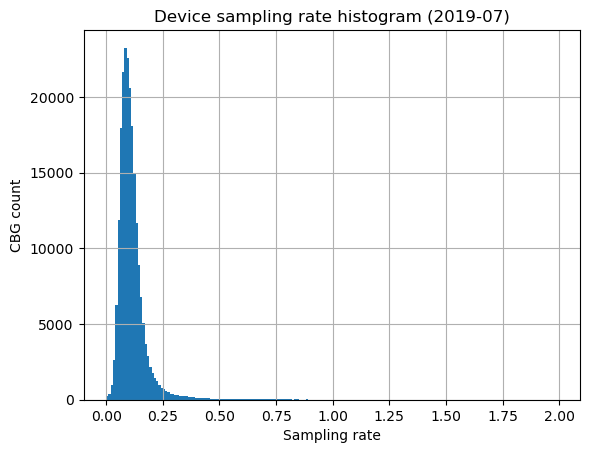

In [33]:
fig, ax = plt.subplots()

ax.set_title(f"Device sampling rate histogram ({year}-{month:02})")
ax.set_xlabel("Sampling rate")
ax.set_ylabel("CBG count")

panel_ACS_df.query("totalpopulation > 0  ")['sampling_rate'].dropna().hist(ax=ax, bins=np.array(range(0, 200,1))/100)

In [34]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

National device and population count:

county_device                35953264
county_device_population    324683983
dtype: int64


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US       010010201001   
1       2019    7     AL               US       010010201002   
2       2019    7     AL               US       010010202001   
3       2019    7     AL               US       010010202002   
4       2019    7     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
217468  2019    7     WY               US       560459511001   
217469  2019    7     WY               US       560459511002   
217470  2019    7     WY               US       560459513001   
217471  2019    7     WY               US       560459513002   
217472  2019    7     WY               US       560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          10.579710       0.094521       01001   
1                  1263           9.867188       0.101346       01001   
2                   835           9.382022       0.106587       01001   
3                  1124           9.289256       0.107651       01001   
4                  2774           9.246667       0.108147       01001   
...                 ...                ...            ...         ...   
217468             1450          11.068702       0.090345       56045   
217469             1844          12.211921       0.081887       56045   
217470             1314          11.135593       0.089802       56045   
217471             1164           8.374101       0.119416       56045   
217472             1277          11.824074       0.084573       56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [35]:
# sampling_rate

## Compute the inbounds for each destination CBG

merge the device_home_area and person_per_device, then groupby the destination

In [36]:
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df

origin   destination     device        stop
0         010010208012  010010201001  94.271642  384.358209
1         010010205002  010010201001  93.188060  379.940299
2         010010208021  010010201001  86.686567  353.432836
3         010010208022  010010201001  85.602985  349.014925
4         010010206001  010010201001  80.185075  326.925373
...                ...           ...        ...         ...
83595176  460539712001  560459513003   5.318542   47.131537
83595177  171430039003  560459513003   5.318542   47.131537
83595178  080690017043  560459513003   5.318542   47.131537
83595179  460819661004  560459513003   5.318542   47.131537
83595180  470370183021  560459513003   5.318542   47.131537

[83595181 rows x 4 columns]

In [37]:
# people_per_device_df = pd.read_csv(person_per_device_fname, index=False)

print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

Loading people_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\person_per_device_2019_07.csv
Total totalpopulation (billion): 0.324683983


YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US         10010201001   
1       2019    7     AL               US         10010201002   
2       2019    7     AL               US         10010202001   
3       2019    7     AL               US         10010202002   
4       2019    7     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
217468  2019    7     WY               US        560459511001   
217469  2019    7     WY               US        560459511002   
217470  2019    7     WY               US        560459513001   
217471  2019    7     WY               US        560459513002   
217472  2019    7     WY               US        560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          10.579710       0.094521         1001   
1                  1263           9.867188       0.101346         1001   
2                   835           9.382022       0.106587         1001   
3                  1124           9.289256       0.107651         1001   
4                  2774           9.246667       0.108147         1001   
...                 ...                ...            ...          ...   
217468             1450          11.068702       0.090345        56045   
217469             1844          12.211921       0.081887        56045   
217470             1314          11.135593       0.089802        56045   
217471             1164           8.374101       0.119416        56045   
217472             1277          11.824074       0.084573        56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [38]:
origin_person_per_device_df = device_home_areas_df.merge(person_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on="origin", right_on="CBG_FIPS")
origin_person_per_device_df

origin   destination      device        stop      CBG_FIPS  \
0         010010208012  010010201001   94.271642  384.358209  010010208012   
1         010010208012  010010201002   33.448378  818.800885  010010208012   
2         010010208012  010010202001   46.070362  504.588486  010010208012   
3         010010208012  010010202002  207.505525  876.179558  010010208012   
4         010010208012  010010203001   43.713647  676.107383  010010208012   
...                ...           ...         ...         ...           ...   
83530287  560139403005  560399676002    4.829348   19.770729  560139403005   
83530288  560139403005  560399677012    4.584683   19.677069  560139403005   
83530289  560139403005  560399677024    4.937013   15.578503  560139403005   
83530290  560139403005  560399678002    4.856649   21.869430  560139403005   
83530291  560139403005  560399678004    4.893464   18.048354  560139403005   

          person_per_device  person_per_device_county  
0                  6.810496                  7.983278  
1                  6.810496                  7.983278  
2                  6.810496                  7.983278  
3                  6.810496                  7.983278  
4                  6.810496                  7.983278  
...                     ...                       ...  
83530287          24.490196                 12.735765  
83530288          24.490196                 12.735765  
83530289          24.490196                 12.735765  
83530290          24.490196                 12.735765  
83530291          24.490196                 12.735765  

[83530292 rows x 7 columns]

In [39]:
origin_person_per_device_df['person_CBG_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device']
origin_person_per_device_df['person_county_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device_county']
origin_person_per_device_df[['person_CBG_rate','person_county_rate']].sum() / 10**9

person_CBG_rate       6.650827
person_county_rate    6.667090
dtype: float64

In [40]:
origin_person_per_device_df[['person_CBG_rate', 'device','stop']].sum() / 10**9

person_CBG_rate    6.650827
device             0.744240
stop               3.964140
dtype: float64

In [41]:
def get_inbound_person_per_device(df):
    inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
    inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
    return {"inboud_per_per_device_CBG_rate": inboud_per_per_device_CBG_rate, "inboud_per_per_device_county_rate": inboud_per_per_device_county_rate}

CBG_destination_inbound_per_device = origin_person_per_device_df.iloc[:].groupby('destination').progress_apply(get_inbound_person_per_device)
CBG_destination_inbound_per_device_df = pd.DataFrame(CBG_destination_inbound_per_device.tolist(), index=CBG_destination_inbound_per_device.index)
CBG_destination_inbound_per_device_df.to_csv(CBG_destination_inbound_per_device_fname)
print(CBG_destination_inbound_per_device_df.mean())
CBG_destination_inbound_per_device_df

100%|████████████████████████████████████████████████████████████████████████| 217690/217690 [01:20<00:00, 2719.25it/s]


inboud_per_per_device_CBG_rate       9.688071
inboud_per_per_device_county_rate    9.442508
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        7.767859   
010010201002                        7.985290   
010010202001                        7.528022   
010010202002                        7.568313   
010010203001                        7.722269   
...                                      ...   
560459511001                        9.337332   
560459511002                        9.051214   
560459513001                        9.762791   
560459513002                        8.556838   
560459513003                        9.506819   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           7.813323  
010010201002                           7.886066  
010010202001                           7.806372  
010010202002                           7.791698  
010010203001                           7.762251  
...                                         ...  
560459511001                           9.475474  
560459511002                           9.243374  
560459513001                           9.922073  
560459513002                           8.895291  
560459513003                           9.511277  

[217690 rows x 2 columns]

In [42]:
print("Loading CBG_destination_inbound_per_device_df from:", CBG_destination_inbound_per_device_fname)
CBG_destination_inbound_per_device_df = pd.read_csv(CBG_destination_inbound_per_device_fname, dtype={"destination": str}).set_index('destination')

print("CBG_destination_inbound_per_device_df.mean(): \n", CBG_destination_inbound_per_device_df.mean() )
CBG_destination_inbound_per_device_df

Loading CBG_destination_inbound_per_device_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\CBG_destination_inbound_per_device_201907.csv
CBG_destination_inbound_per_device_df.mean(): 
 inboud_per_per_device_CBG_rate       9.688071
inboud_per_per_device_county_rate    9.442508
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        7.767859   
010010201002                        7.985290   
010010202001                        7.528022   
010010202002                        7.568313   
010010203001                        7.722269   
...                                      ...   
560459511001                        9.337332   
560459511002                        9.051214   
560459513001                        9.762791   
560459513002                        8.556838   
560459513003                        9.506819   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           7.813323  
010010201002                           7.886066  
010010202001                           7.806372  
010010202002                           7.791698  
010010203001                           7.762251  
...                                         ...  
560459511001                           9.475474  
560459511002                           9.243374  
560459513001                           9.922073  
560459513002                           8.895291  
560459513003                           9.511277  

[217690 rows x 2 columns]

In [43]:
print("Loading adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
# adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={"CBG": str}).set_index('CBG')

print("Total adjusted hourly stops (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 10**9)
# try:
adjusted_dwelling_time_stop_CBG_df.set_index('CBG', inplace=True)

Loading adjusted_dwelling_time_stop_CBG_df from: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\adjusted_dwelling_time_stop_CBG_2019_07.csv
Total adjusted hourly stops (billion): 3.96572017


In [44]:
adjusted_dwelling_time_stop_inbound_per_device_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(CBG_destination_inbound_per_device_df,left_index=True, right_index=True)
adjusted_dwelling_time_stop_inbound_per_device_CBG_df.index.name = 'CBG'
adjusted_dwelling_time_stop_inbound_per_device_CBG_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001       0       8       3       0       0       3       3      10   
010010201002      12       9       8       5       3       3       6       9   
010010202001       6       5       6       5       4       2       1       4   
010010202002       3       0       2       3       9       4      14      44   
010010203001      16       6       6       6       7       9       9      25   
...              ...     ...     ...     ...     ...     ...     ...     ...   
560459511001       6       4       4       3       7       1       5      14   
560459511002       4       0       0       0       0       2       3       8   
560459513001       3       7       6       6       7      11      15       8   
560459513002       3       2       4       5       4      10      13      21   
560459513003       1       5       2       1       4       3      10      10   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001       9       12       10       12       14       14       16   
010010201002      17       17       21       17       24       24       33   
010010202001      15       16       16       30       27       12       12   
010010202002      40       52       47       55       71       61       44   
010010203001      31       34       32       36       49       45       46   
...              ...      ...      ...      ...      ...      ...      ...   
560459511001      22       21       13       18       17       19       18   
560459511002      12       15       14       15       16        9       20   
560459513001      21       17       13       20       27       18       18   
560459513002      32       38       31       38       45       41       54   
560459513003      13       13        8        7       21       20       17   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001       17       20       16       24       16       12       13   
010010201002       31       42       57       66       67       52       42   
010010202001       14       18       31       32       27       27       19   
010010202002       45       54       50       37       44       32       11   
010010203001       58       64       77       75       63       71       49   
...               ...      ...      ...      ...      ...      ...      ...   
560459511001       25       20       26       24       13       14        8   
560459511002       11       16       17       10       14       21       16   
560459513001       16       25       22        8       10       19       12   
560459513002       35       36       23       34       17       23       25   
560459513003       23       16       20       14        6       12        8   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001        5        4        2        2        0        0        1   
010010201002       27       16       15       15       14        9        9   
010010202001       10       10        9        6        5        4        3   
010010202002       11       11        7        5        4        5        4   
010010203001       25       20       18       13        6        3        2   
...               ...      ...      ...      ...      ...      ...      ...   
560459511001        9        5        3        1        1        3        5   
560459511002        5        7        2        2        1        3        1   
560459513001       10        5        1        3        2        4        1   
560459513002       16        9        6        3        5    

In [45]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1]
print("hour_cnt:", hour_cnt)

hour_cnt: 744


In [46]:
# inbound_hourly_df.iloc[:, hour]
# inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']

In [47]:

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # 70.4215236989238 billion
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_county_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # 70.4215236989238 billion
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_CBG_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

print("We will use the larger resutls: per_device_CBG_rate.")

print("Saving inbound_hourly_df at:", inbound_hourly_df_fname)

if save_file:
    inbound_hourly_df.to_csv(inbound_hourly_df_fname)
inbound_hourly_df

100%|███████████████████████████████████████████████████████████████████████████████| 744/744 [00:01<00:00, 558.25it/s]


Total restored inbound (billion) using per_device_county_rate: 35.405269253077286


100%|███████████████████████████████████████████████████████████████████████████████| 744/744 [00:01<00:00, 622.99it/s]


Total restored inbound (billion) using per_device_CBG_rate: 35.30756358206329
We will use the larger resutls: per_device_CBG_rate.
Saving inbound_hourly_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\inbound_hourly_201907.csv


hour_1     hour_2     hour_3     hour_4     hour_5  \
CBG                                                                    
010010201001    0.000000  62.142869  23.303576   0.000000   0.000000   
010010201002   95.823481  71.867611  63.882320  39.926450  23.955870   
010010202001   45.168133  37.640111  45.168133  37.640111  30.112088   
010010202002   22.704940   0.000000  15.136626  22.704940  68.114819   
010010203001  123.556311  46.333617  46.333617  46.333617  54.055886   
...                  ...        ...        ...        ...        ...   
560459511001   56.023993  37.349329  37.349329  28.011997  65.361326   
560459511002   36.204856   0.000000   0.000000   0.000000   0.000000   
560459513001   29.288372  68.339534  58.576743  58.576743  68.339534   
560459513002   25.670513  17.113675  34.227350  42.784188  34.227350   
560459513003    9.506819  47.534093  19.013637   9.506819  38.027274   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
010010201001   23.303576   23.303576   77.678586   69.910727   93.214303   
010010201002   23.955870   47.911740   71.867611  135.749931  135.749931   
010010202001   15.056044    7.528022   30.112088  112.920332  120.448354   
010010202002   30.273253  105.956385  333.005781  302.732528  393.552286   
010010203001   69.500425   69.500425  193.056736  239.390353  262.557162   
...                  ...         ...         ...         ...         ...   
560459511001    9.337332   46.686661  130.722651  205.421309  196.083977   
560459511002   18.102428   27.153642   72.409711  108.614567  135.768208   
560459513001  107.390696  146.441858   78.102324  205.018602  165.967439   
560459513002   85.568375  111.238888  179.693589  273.818802  325.159827   
560459513003   28.520456   95.068186   95.068186  123.588641  123.588641   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001   77.678586   93.214303  108.750020  108.750020  124.285738   
010010201002  167.691091  135.749931  191.646961  191.646961  263.514572   
010010202001  120.448354  225.840663  203.256597   90.336265   90.336265   
010010202002  355.710720  416.257226  537.350237  461.667105  333.005781   
010010203001  247.112623  278.001701  378.391203  347.502126  355.224395   
...                  ...         ...         ...         ...         ...   
560459511001  121.385319  168.071980  158.734648  177.409312  168.071980   
560459511002  126.716994  135.768208  144.819422   81.460925  181.024278   
560459513001  126.916277  195.255811  263.595345  175.730230  175.730230   
560459513002  265.261964  325.159827  385.057690  350.830339  462.069228   
560459513003   76.054548   66.547730  199.643190  190.136371  161.615915   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001  132.053596  155.357172  124.285738  186.428606  124.285738   
010010201002  247.543992  335.382182  455.161533  527.029144  535.014434   
010010202001  105.392309  135.504398  233.368685  240.896707  203.256597   
010010202002  340.574094  408.688913  378.415660  280.027588  333.005781   
010010203001  447.891629  494.225245  594.614748  579.170209  486.502976   
...                  ...         ...         ...         ...         ...   
560459511001  233.433305  186.746644  242.770638  224.095973  121.385319   
560459511002   99.563353  144.819422  153.870636   90.512139  126.716994   
560459513001  156.204649  244.069764  214.781392   78.102324   97.627906   
560459513002  299.489314  308.046152  196.807264  290.932477  145.466238   
560459513003  218.656827  152.109097  190.136371  133.095460   57.040911   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                                   

In [48]:
# Get the hourly aggregated inbounds for all CBGs
inbound_hourly_df.iloc[:, :hour_cnt].sum().sum() / 10**9

35.32859618313445

In [49]:
hourly_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(), columns=['inboud']).reset_index()[['inboud']]

# if save_file:
hourly_agregated_inbound_df.to_csv(hourly_agregated_inbound_fname, index=False)
print("Save hourly_agregated_inbound_df at:", hourly_agregated_inbound_fname)

CBG_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(axis=1), columns=['inboud'])
CBG_agregated_inbound_df.to_csv(CBG_agregated_inbound_fname)
print("Save CBG_agregated_inbound_df at:", CBG_agregated_inbound_fname)

Save hourly_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\hourly_agregated_inbound_201907.csv
Save CBG_agregated_inbound_df at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\CBG_agregated_inbound_201907.csv


In [50]:
hourly_agregated_inbound_df
# CBG_agregated_inbound_df.sum()

inboud
0    1.792599e+07
1    1.285431e+07
2    1.025277e+07
3    9.126734e+06
4    1.006224e+07
..            ...
739  7.270195e+07
740  6.312390e+07
741  4.972049e+07
742  3.455941e+07
743  2.103260e+07

[744 rows x 1 columns]

In [51]:
CBG_agregated_inbound_df

inboud
CBG                        
010010201001   57482.153623
010010201002  152862.407561
010010202001   86903.487167
010010202002  195958.765398
010010203001  233382.427590
...                     ...
560459511001   79563.407844
560459511002   78763.663290
560459513001   75095.384930
560459513002  121849.366679
560459513003   70683.195925

[217690 rows x 1 columns]

In [52]:
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US       010010201001   
1       2019    7     AL               US       010010201002   
2       2019    7     AL               US       010010202001   
3       2019    7     AL               US       010010202002   
4       2019    7     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
217468  2019    7     WY               US       560459511001   
217469  2019    7     WY               US       560459511002   
217470  2019    7     WY               US       560459513001   
217471  2019    7     WY               US       560459513002   
217472  2019    7     WY               US       560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          10.579710       0.094521       01001   
1                  1263           9.867188       0.101346       01001   
2                   835           9.382022       0.106587       01001   
3                  1124           9.289256       0.107651       01001   
4                  2774           9.246667       0.108147       01001   
...                 ...                ...            ...         ...   
217468             1450          11.068702       0.090345       56045   
217469             1844          12.211921       0.081887       56045   
217470             1314          11.135593       0.089802       56045   
217471             1164           8.374101       0.119416       56045   
217472             1277          11.824074       0.084573       56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [53]:
# Load flow data (month)
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={'origin':str, 'destination':str})
device_home_areas_df

origin   destination     device        stop
0         010010208012  010010201001  94.271642  384.358209
1         010010205002  010010201001  93.188060  379.940299
2         010010208021  010010201001  86.686567  353.432836
3         010010208022  010010201001  85.602985  349.014925
4         010010206001  010010201001  80.185075  326.925373
...                ...           ...        ...         ...
83595176  460539712001  560459513003   5.318542   47.131537
83595177  171430039003  560459513003   5.318542   47.131537
83595178  080690017043  560459513003   5.318542   47.131537
83595179  460819661004  560459513003   5.318542   47.131537
83595180  470370183021  560459513003   5.318542   47.131537

[83595181 rows x 4 columns]

In [54]:
device_home_areas_person_per_device_df = device_home_areas_df.merge(people_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on='origin', right_on='CBG_FIPS')
device_home_areas_person_per_device_df

origin   destination      device        stop      CBG_FIPS  \
0         010010208012  010010201001   94.271642  384.358209  010010208012   
1         010010208012  010010201002   33.448378  818.800885  010010208012   
2         010010208012  010010202001   46.070362  504.588486  010010208012   
3         010010208012  010010202002  207.505525  876.179558  010010208012   
4         010010208012  010010203001   43.713647  676.107383  010010208012   
...                ...           ...         ...         ...           ...   
83530287  560139403005  560399676002    4.829348   19.770729  560139403005   
83530288  560139403005  560399677012    4.584683   19.677069  560139403005   
83530289  560139403005  560399677024    4.937013   15.578503  560139403005   
83530290  560139403005  560399678002    4.856649   21.869430  560139403005   
83530291  560139403005  560399678004    4.893464   18.048354  560139403005   

          person_per_device  person_per_device_county  
0                  6.810496                  7.983278  
1                  6.810496                  7.983278  
2                  6.810496                  7.983278  
3                  6.810496                  7.983278  
4                  6.810496                  7.983278  
...                     ...                       ...  
83530287          24.490196                 12.735765  
83530288          24.490196                 12.735765  
83530289          24.490196                 12.735765  
83530290          24.490196                 12.735765  
83530291          24.490196                 12.735765  

[83530292 rows x 7 columns]

In [55]:
device_home_areas_person_per_device_df['stop'].sum() / 10**9, device_home_areas_person_per_device_df['device'].sum() / 10**9

(3.9641402254693316, 0.7442401365840049)

In [56]:
# Not correct
# device_home_areas_person_per_device_df['outbound'] = device_home_areas_person_per_device_df['stop'] * device_home_areas_person_per_device_df['person_per_device']
# device_home_areas_person_per_device_df['outbound'].sum()  / 10**9

In [57]:
# no_dict_colum_month_df = pd.read_csv(no_dict_colum_fname, dtype={"AREA":str})
# no_dict_colum_month_df['destination'] = no_dict_colum_month_df['AREA'].astype(str).str.zfill(12)
# no_dict_colum_month_df

In [58]:
# no_dict_colum_month_df['adjusted_raw_stop'].sum() / 10**9

In [59]:
# destination_CBG_inbound_df = device_home_areas_person_per_device_df.groupby('destination', as_index=False)[['inbound']].sum()#.sum()
# destination_CBG_inbound_df['destination'] = destination_CBG_inbound_df['destination'].astype(str).str.zfill(12)

# destination_CBG_inbound_device_device_count_df = destination_CBG_inbound_df.merge(no_dict_colum_month_df[['destination', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'MEDIAN_DWELL']],
#                                                                                  left_on="destination",
#                                                                                  right_on="destination")

# destination_CBG_inbound_device_device_count_df['inbound_per_stop'] = destination_CBG_inbound_device_device_count_df['inbound'] / destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS']
# destination_CBG_inbound_device_device_count_df

In [60]:
# destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000, destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS'].sum() / 1000000000

In [61]:
# destination_CBG_inbound_device_device_count_df.to_csv(CBG_destination_inbound_fname, index=False)
# print("Saved destination_CBG_inbound_device_device_count_df as:", CBG_destination_inbound_fname)
# destination_CBG_inbound_device_device_count_df

In [62]:
# destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000

## Compute the hourly inbound (not used, not correct)

In [63]:
# destination_CBG_inbound_df = pd.read_csv(CBG_destination_inbound_fname, dtype={'destination':str})
# destination_CBG_inbound_df

In [64]:
# destination_CBG_inbound_df.sample(30)['inbound_per_stop']#.mean()

In [65]:
# print("Loading in adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
# adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})
# print("Total adjusted observed stop (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 1000000000)
# adjusted_dwelling_time_stop_CBG_df

In [66]:
# hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1
# print("hour_cnt:", hour_cnt)

In [67]:
# adjusted_stop_inbound_per_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(destination_CBG_inbound_df[['destination','inbound_per_stop']],
#                                                                                 left_on="CBG",
#                                                                                 right_on="destination",
#                                                                                 )
# adjusted_stop_inbound_per_stop_CBG_df

In [68]:
# hourly_inbound_df = adjusted_stop_inbound_per_stop_CBG_df.copy()
# for h in range(hour_cnt):
#     hourly_inbound_df.iloc[:, h + 1] = hourly_inbound_df.iloc[:, h + 1] * hourly_inbound_df['inbound_per_stop']  

# hourly_inbound_df = hourly_inbound_df.iloc[:, :-2]
# print("Total inbound (billion):", hourly_inbound_df.iloc[:, 1:].sum().sum() / 1000000000)
# hourly_inbound_df

In [69]:
# hourly_inbound_df.iloc[:, 1:].sum().sum()

# IPF  v2

### Restored the outbound according to device sampling rate

In [70]:
# CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname)
print("Total observed stops (billion): ", CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)
CBG_device_stop_origin_distribution_df

Total observed stops (billion):  3.9657193840000016


device          stop
origin                                 
010010201001  1361.108652   8481.023583
010010201002  2999.020199  21060.042640
010010202001  1934.802028  11877.968415
010010202002  2196.758954  12855.512216
010010203001  6070.904283  40928.020118
...                   ...           ...
CA:61020030     13.705083     73.472922
CA:61040084    228.275749   1660.936625
CA:61050145      4.693618     55.643167
CA:61060141      4.737710     17.912582
CA:62040059      4.737710     17.912582

[223208 rows x 2 columns]

In [71]:
# people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US       010010201001   
1       2019    7     AL               US       010010201002   
2       2019    7     AL               US       010010202001   
3       2019    7     AL               US       010010202002   
4       2019    7     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
217468  2019    7     WY               US       560459511001   
217469  2019    7     WY               US       560459511002   
217470  2019    7     WY               US       560459513001   
217471  2019    7     WY               US       560459513002   
217472  2019    7     WY               US       560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          10.579710       0.094521       01001   
1                  1263           9.867188       0.101346       01001   
2                   835           9.382022       0.106587       01001   
3                  1124           9.289256       0.107651       01001   
4                  2774           9.246667       0.108147       01001   
...                 ...                ...            ...         ...   
217468             1450          11.068702       0.090345       56045   
217469             1844          12.211921       0.081887       56045   
217470             1314          11.135593       0.089802       56045   
217471             1164           8.374101       0.119416       56045   
217472             1277          11.824074       0.084573       56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [72]:
CBG_origin_stop_distribution_sampling_rate_df = CBG_device_stop_origin_distribution_df.reset_index().merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
CBG_origin_stop_distribution_sampling_rate_df

origin       device          stop  YEAR  MON REGION  \
0       010010201001  1361.108652   8481.023583  2019    7     AL   
1       010010201002  2999.020199  21060.042640  2019    7     AL   
2       010010202001  1934.802028  11877.968415  2019    7     AL   
3       010010202002  2196.758954  12855.512216  2019    7     AL   
4       010010203001  6070.904283  40928.020118  2019    7     AL   
...              ...          ...           ...   ...  ...    ...   
217228  560459511001  1519.628548  10527.099744  2019    7     WY   
217229  560459511002  1974.925108  11887.430714  2019    7     WY   
217230  560459513001   970.205889   6536.275288  2019    7     WY   
217231  560459513002  1239.305411   7647.684435  2019    7     WY   
217232  560459513003   916.050102   6011.570341  2019    7     WY   

       ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING  \
0                    US       010010201001                       69   
1                    US       010010201002                      128   
2                    US       010010202001                       89   
3                    US       010010202002                      121   
4                    US       010010203001                      300   
...                 ...                ...                      ...   
217228               US       560459511001                      131   
217229               US       560459511002                      151   
217230               US       560459513001                      118   
217231               US       560459513002                      139   
217232               US       560459513003                      108   

        NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  totalpopulation  \
0                                 31.0  010010201001              730   
1                                 61.0  010010201002             1263   
2                                 29.0  010010202001              835   
3                                 45.0  010010202002             1124   
4                                121.0  010010203001             2774   
...                                ...           ...              ...   
217228                            59.0  560459511001             1450   
217229                            77.0  560459511002             1844   
217230                            50.0  560459513001             1314   
217231                            58.0  560459513002             1164   
217232                            35.0  560459513003             1277   

        person_per_device  sampling_rate county_FIPS  county_device  \
0               10.579710       0.094521       01001           6937   
1                9.867188       0.101346       01001           6937   
2                9.382022       0.106587       01001           6937   
3                9.289256       0.107651       01001           6937   
4                9.246667       0.108147       01001           6937   
...                   ...            ...         ...            ...   
217228          11.068702       0.090345       56045            647   
217229          12.211921       0.081887       56045            647   
217230          11.135593       0.089802       56045            647   
217231           8.374101       0.119416       56045            647   
217232          11.824074       0.084573       56045            647   

        county_device_daytime  county_device_population  \
0                        6937                     55380   
1                        6937                     55380   
2                        6937                     55380   
3                        6937                     55380   
4                        6937                     55380   
...                       ...                       ...   
217228                    647                      7049   
217229                    647                      7049   
217230                    647                      7049   
217231      

Because "stop" is the combination of visitors from various HOME CBGs! So, we need to compute the inbound. 

The outbound compuated below can be view as the distribution only.

In [73]:
person_per_device_national = CBG_origin_stop_distribution_sampling_rate_df['totalpopulation'].sum() / CBG_origin_stop_distribution_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()
CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * person_per_device_national
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using national sampling rate:", restored_total_restored_outbound_count)  # 37.44716723845148 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device_county']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using county sampling rate:", restored_total_restored_outbound_count)  # 50.96843487672891 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() / 10**9
CBG_origin_stop_distribution_sampling_rate_df.to_csv(CBG_origin_outbound_distribution_sampling_rate_fname, index=False)
print("Restored total outbound distribution (billion) using CBG sampling rate:", restored_total_restored_outbound_count)  # 61.19985609714293 billion

print("Saved CBG_origin_outbound_distribution_sampling_rate at:", CBG_origin_outbound_distribution_sampling_rate_fname)

Restored total outbound distribution (billion) using national sampling rate: 35.79144624202274
Restored total outbound distribution (billion) using county sampling rate: 35.41089708801081
Restored total outbound distribution (billion) using CBG sampling rate: 35.31378709152973
Saved CBG_origin_outbound_distribution_sampling_rate at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\CBG_origin_outbound_distribution_sampling_rate_201907.csv


In [74]:
# use the total_inboud to calibrate the outbound

# restored_outbound_countCBG_origin_stop_distribution_sampling_rate_df
# CBG_origin_stop_distribution_sampling_rate_df
CBG_origin_stop_distribution_sampling_rate_df

origin       device          stop  YEAR  MON REGION  \
0       010010201001  1361.108652   8481.023583  2019    7     AL   
1       010010201002  2999.020199  21060.042640  2019    7     AL   
2       010010202001  1934.802028  11877.968415  2019    7     AL   
3       010010202002  2196.758954  12855.512216  2019    7     AL   
4       010010203001  6070.904283  40928.020118  2019    7     AL   
...              ...          ...           ...   ...  ...    ...   
217228  560459511001  1519.628548  10527.099744  2019    7     WY   
217229  560459511002  1974.925108  11887.430714  2019    7     WY   
217230  560459513001   970.205889   6536.275288  2019    7     WY   
217231  560459513002  1239.305411   7647.684435  2019    7     WY   
217232  560459513003   916.050102   6011.570341  2019    7     WY   

       ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING  \
0                    US       010010201001                       69   
1                    US       010010201002                      128   
2                    US       010010202001                       89   
3                    US       010010202002                      121   
4                    US       010010203001                      300   
...                 ...                ...                      ...   
217228               US       560459511001                      131   
217229               US       560459511002                      151   
217230               US       560459513001                      118   
217231               US       560459513002                      139   
217232               US       560459513003                      108   

        NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  totalpopulation  \
0                                 31.0  010010201001              730   
1                                 61.0  010010201002             1263   
2                                 29.0  010010202001              835   
3                                 45.0  010010202002             1124   
4                                121.0  010010203001             2774   
...                                ...           ...              ...   
217228                            59.0  560459511001             1450   
217229                            77.0  560459511002             1844   
217230                            50.0  560459513001             1314   
217231                            58.0  560459513002             1164   
217232                            35.0  560459513003             1277   

        person_per_device  sampling_rate county_FIPS  county_device  \
0               10.579710       0.094521       01001           6937   
1                9.867188       0.101346       01001           6937   
2                9.382022       0.106587       01001           6937   
3                9.289256       0.107651       01001           6937   
4                9.246667       0.108147       01001           6937   
...                   ...            ...         ...            ...   
217228          11.068702       0.090345       56045            647   
217229          12.211921       0.081887       56045            647   
217230          11.135593       0.089802       56045            647   
217231           8.374101       0.119416       56045            647   
217232          11.824074       0.084573       56045            647   

        county_device_daytime  county_device_population  \
0                        6937                     55380   
1                        6937                     55380   
2                        6937                     55380   
3                        6937                     55380   
4                        6937                     55380   
...                       ...                       ...   
217228                    647                      7049   
217229                    647                      7049   
217230                    647                      7049   
217231      

## Load data

In [75]:
hourly_agregated_inbound_df = pd.read_csv(hourly_agregated_inbound_fname)
total_inbound = hourly_agregated_inbound_df['inboud'].sum()
print("total_inbound (billion):", total_inbound / 10**9)

total_inbound (billion): 35.32859618313445


In [76]:
# hourly_agregated_inbound_df

In [77]:
# CBG_restored_origin_outbound_df = pd.read_csv(CBG_origin_outbound_distribution_sampling_rate_fname)
CBG_restored_origin_outbound_df = CBG_origin_stop_distribution_sampling_rate_df
total_outbound = CBG_restored_origin_outbound_df['restored_outbound_count'].sum()
print("Total outbound distribution (billions): ",  total_outbound / 1000000000)


factor = total_inbound / total_outbound
print("factor:", factor)


CBG_restored_origin_outbound_df['restored_outbound_count'] = CBG_restored_origin_outbound_df['restored_outbound_count'] * factor

print("Total outbound distribution (billions): ",   CBG_restored_origin_outbound_df['restored_outbound_count'].sum() / 10**9)

Total outbound distribution (billions):  35.31378709152973
factor: 1.0004193572206328
Total outbound distribution (billions):  35.328596183134444


In [78]:
CBG_restored_origin_outbound_df.shape

(217233, 20)

In [79]:
# CBG_restored_origin_outbound_df

In [80]:
# Load 

In [81]:
# adjusted_dwelling_time_stop_natinol_df = pd.read_csv(adjusted_dwelling_time_stop_natinol_fname)
# total_adjusted_stops = adjusted_dwelling_time_stop_natinol_df['stop'].sum()
# print("total_adjusted_stops (billion):", total_adjusted_stops / 1000000000)

# # covnert distribution to acution outbound
# outbound_per_stop = total_outbound / total_adjusted_stops 

# adjusted_dwelling_time_stop_natinol_df['stop'] *= outbound_per_stop
# print("total outbouds (billion):", adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 1000000000)

### start IPF

In [82]:
import numpy as np
from ipfn import ipfn

restored_CBG_outbound_arr = CBG_restored_origin_outbound_df['restored_outbound_count'].to_numpy()
restored_hourly_outbound_arr = hourly_agregated_inbound_df['inboud'].to_numpy()  # 

aggregates = [restored_CBG_outbound_arr, restored_hourly_outbound_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_CBG_outbound_arr), len(restored_hourly_outbound_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

e:\ProgramData\Anaconda3\lib\site-packages\ipfn\ipfn.py:146: RuntimeWarning: invalid value encountered in double_scalars
  if abs(m_ijk / ori_ijk - 1) > max_conv:


(217233, 744)


In [83]:
print("Error of IPF:")
print((m.sum(axis=1) - restored_CBG_outbound_arr).sum(), (m.sum(axis=0) - restored_hourly_outbound_arr).sum())

Error of IPF:
8.64470713679566e-07 -6.31529837846756e-06


In [84]:
(m.sum(axis=1) - restored_CBG_outbound_arr).max(), (m.sum(axis=0) - restored_hourly_outbound_arr).max()

(9.313225746154785e-10, 2.682209014892578e-06)

In [85]:
(m.sum(axis=1) - restored_CBG_outbound_arr).min(), (m.sum(axis=0) - restored_hourly_outbound_arr).min()

(-4.656612873077393e-10, -3.248453140258789e-06)

In [86]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_hourly_outbound_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total outbound visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = CBG_restored_origin_outbound_df['origin'].astype(str).str.zfill(12)
IPF_df = IPF_df[['CBG'] + hourly_columns].set_index('CBG')

if save_file:
    print("Saving IPF at:", IPF_results_fname)
    IPF_df.to_csv(IPF_results_fname, index=True)
    print("Saved IPF_results at:", IPF_results_fname)
IPF_df

Total outbound visitor (billion): 35.328596183134444
Saving IPF at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\IPF_origin_outgoer_hourly_201907.csv
Saved IPF_results at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\IPF_origin_outgoer_hourly_201907.csv


hour_1      hour_2      hour_3     hour_4      hour_5  \
CBG                                                                       
010010201001   45.547106   32.660768   26.050675  23.189593   25.566564   
010010201002  105.485163   75.640950   60.332257  53.706111   59.211076   
010010202001   56.568854   40.564206   32.354566  28.801142   31.753307   
010010202002   60.619043   43.468502   34.671072  30.863232   34.026764   
010010203001  192.107662  137.755925  109.876012  97.808595  107.834136   
...                  ...         ...         ...        ...         ...   
560459511001   59.148562   42.414055   33.830031  30.114560   33.201352   
560459511002   73.690367   52.841644   42.147218  37.518291   41.363977   
560459513001   36.947277   26.494031   21.132002  18.811125   20.739296   
560459513002   32.509245   23.311622   18.593669  16.551571   18.248134   
560459513003   36.082268   25.873753   20.637259  18.370719   20.253748   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
010010201001   39.170226   71.475333  119.271988  146.006215  151.651443   
010010201002   90.716579  165.533834  276.228855  338.144191  351.218298   
010010202001   48.648860   88.771341  148.134103  181.337631  188.348923   
010010202002   52.131997   95.127147  158.740134  194.320952  201.834235   
010010203001  165.211386  301.467213  503.062975  615.822059  639.632386   
...                  ...         ...         ...         ...         ...   
560459511001   50.867393   92.819578  154.889458  189.607166  196.938194   
560459511002   63.373254  115.639476  192.969373  236.222505  245.355882   
560459513001   31.774427   57.979950   96.752035  118.438527  123.017869   
560459513002   27.957747   51.015516   85.130377  104.211931  108.241212   
560459513003   31.030524   56.622524   94.486876  115.665643  120.137774   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001  159.874965  177.461103  202.783419  200.041673  193.058298   
010010201002  370.263626  410.992373  469.637783  463.288014  447.114816   
010010202001  198.562420  220.404152  251.854107  248.448896  239.775645   
010010202002  212.778993  236.184538  269.886231  266.237216  256.942982   
010010203001  674.317393  748.491847  855.295801  843.731717  814.277383   
...                  ...         ...         ...         ...         ...   
560459511001  207.617457  230.455236  263.339403  259.778905  250.710128   
560459511002  258.660666  287.113163  328.081974  323.646120  312.347764   
560459513001  129.688694  143.954362  164.495528  162.271455  156.606624   
560459513002  114.110751  126.662856  144.736658  142.779737  137.795354   
560459513003  126.652422  140.584102  160.644358  158.472355  152.940149   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001  199.038531  214.701344  234.191264  213.815508  186.197933   
010010201002  460.964779  497.239190  542.377015  495.187630  431.226501   
010010202001  247.203008  266.655999  290.862200  265.555803  231.255170   
010010202002  264.902125  285.747901  311.687206  284.568934  247.812461   
010010203001  839.500685  905.562983  987.767171  901.826720  785.341872   
...                  ...         ...         ...         ...         ...   
560459511001  258.476200  278.816305  304.126381  277.665937  241.801093   
560459511002  322.023143  347.363907  378.896521  345.930718  301.248424   
560459513001  161.457718  174.163208  189.973202  173.444628  151.041576   
560459513002  142.063744  153.243077  167.154006  152.610811  132.898768   
560459513003  157.677669  170.085699  185.525549  169.383942  147.505390   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \

In [87]:
# Not use below

##	Adjust stop count by dwelling time

Load the raw stop data and Neighorhood Patterns table.

In [88]:
# Load the raw stop data and Neighorhood Patterns table.

# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# print("Loading no_dict_colum CSV file:", no_dict_colum_fname)
# no_dict_colum_df = pd.read_csv(no_dict_colum_fname)

# no_dict_colum_df

In [89]:
# non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
# print("sum of non_adjusted_dwell_time_stop_CBG_arr (million):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

In [90]:
# adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

# adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

# print("sum of adjusted_dwell_time_stop_CBG_arr (million):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("sum of adjusted_dwell_time_stop_national_arr (million):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000)
# print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

In [91]:
# hourly_columns
# adjusted_dwell_time_stop_national_arr.shape

Convert numpy array to DataFrame

In [92]:
# convert numpy array to DataFrame
# # CBG level
# hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
# adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
# adjusted_dwelling_time_stop_CBG_df['CBG'] = no_dict_colum_df['AREA'].astype(str).str.zfill(12).to_list()
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')


# # national level
# adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

# adjusted_dwelling_time_stop_CBG_df

In [93]:
# print("Adjustted total stop (billion) by dwelling time from CBG and national level (should be the same):")
# print(adjusted_dwelling_time_stop_CBG_df[hourly_columns].sum().sum() / 1000000000,  adjusted_dwelling_time_stop_natinol_df.sum().sum()/ 1000000000)

In [94]:
# # Save CSV files
# adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
# print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

# adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
# print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

###  Convert observed stop counts to actual visitor counts.

#### compute the person_per_device at CBG and county level

Load ACS and home panel data, merge them into device sampling rate table at CBG and county level

In [95]:
# ACS_df = pd.read_csv(ACS_file)
# ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
# print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 1000000)

In [96]:
# print("Loading home panel file:", home_panel_fname)
# panel_df = pd.read_csv(home_panel_fname)
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {int(month)} and ISO_COUNTRY_CODE == 'US' ")
# target_panel_df

In [97]:
# panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
# panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
# panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
# panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
# panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
# print("Data cover US population:", panel_ACS_df['totalpopulation'].sum())
# panel_ACS_df

In [98]:
# get people_per_device of a county

# panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
# sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
#     county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
#     county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
#     county_device_population=('totalpopulation', 'sum'),
#     ) 

# sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

# print("National device and population count:\n")
# print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

# people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
# people_per_device_df.to_csv(person_per_device_fname, index=False)
# people_per_device_df

#### restore the observated stop count to actual visitor count

In [99]:
# people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
# adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})

In [100]:
# adjusted_dwelling_time_stop_CBG_df
# people_per_device_df

In [101]:
# adjusted_dwelling_time_stop_CBG_df.shape

## Get the total outgoer

In [102]:
# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# device_home_areas_df

In [103]:
# # Assume a stop is a device
# hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1


# hourly_stop_sampling_rate_df = adjusted_dwelling_time_stop_CBG_df.merge(people_per_device_df, left_on='CBG', right_on='CBG_FIPS')
# national_people_per_device = hourly_stop_sampling_rate_df['totalpopulation'].sum() / hourly_stop_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()

# print("hour_cnt:", hour_cnt)
# print("national_people_per_device:", national_people_per_device)

# for h in range(hour_cnt):
#     hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device']   # CBG leval   # BUG: person_per_device is for home(origin), not for destination!!!!!!!!!!!!
#     # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * national_people_per_device    # national leval
#     # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device_county']   # county level
    

# ## used      CBG level sampling rate: 51028323628.24674
# ## used   county level sampling rate: 51223351774.32022   # increase 0.3%
# ## used national level sampling rate: 37518194037.32022   # decrease 26.5%

# restored_actual_CBG_hourly_visitor_df = hourly_stop_sampling_rate_df.iloc[:, :hour_cnt + 1]

# print("Restored total visitor count (billion):")
# print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum() / 1000000000)  # used CBG level sampling rate: 51028323628.24674

# print("Restored total visitor dataframe shape:",  restored_actual_CBG_hourly_visitor_df.shape)

In [104]:
# restored_actual_CBG_hourly_visitor_df

In [105]:
# print("Restored actuall CBG hourly visitor (billion):")
# print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum()/ 1000000000)

In [106]:
# restored_actual_target_hourly_visitor_df = pd.DataFrame()
# restored_actual_target_hourly_visitor_df['stop'] = restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum(axis=0) 
# print("Restored actuall target hourly visitor (billion):")
# print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000)
# restored_actual_target_hourly_visitor_df

In [107]:
# save the restored actual visitor count
# restored_actual_CBG_hourly_visitor_df.to_csv(restored_CBG_hourly_vistor_count_fname, index=False)
# restored_actual_target_hourly_visitor_df.to_csv(restored_target_hourly_vistor_count_fname, index=False)

## IPF

### Load data

In [108]:
# restored_actual_target_hourly_visitor_df = pd.read_csv(restored_target_hourly_vistor_count_fname, dtype={'CBG': str})
# print("Restored target total visitor count (billion):")
# print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000) 

# restored_actual_target_hourly_visitor_df

Load the CBG stop distribution and compute the CBG aggregated restored visitors.

How to convert the CBG device distribution to stop distribution?

- option 1: convert the CBG device distribution to people distribution using device sampling rate, then using the people distribution as the stop distribution.
- option 2: compute the stop_per_device for each CBG, and then the stop for each home CBG, then aggregate the home CBG stops.

We use option 2 here.

In [109]:
# CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
# CBG_device_stop_origin_distribution_df

# print("origin observed stop count (billion):")
# print(CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)

In [110]:
# df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
# df['restored_outgoer'] = df['stop'] * df['person_per_device']
# df['restored_outgoer'].sum() / 1000000000

In [111]:



# visitor_per_stop = restored_actual_target_hourly_visitor_df['stop'].sum() / CBG_device_stop_origin_distribution_df['stop'].sum() 
# print("visitor_per_stop:", visitor_per_stop)

# restored_CBG_origin_outgoer_df = CBG_device_stop_origin_distribution_df[['origin', 'stop']].copy()
# restored_CBG_origin_outgoer_df['stop'] = CBG_device_stop_origin_distribution_df['stop'] * visitor_per_stop

# print("restored CBG origin outgoer count (billion):")
# restored_CBG_origin_outgoer_df['stop'].sum() / 1000000000

# restored_CBG_origin_outgoer_df

In [112]:
# import numpy as np
# from ipfn import ipfn

# restored_outgoer_arr = restored_CBG_origin_outgoer_df['stop'].to_numpy()
# restored_actual_target_hourly_visitor_arr = restored_actual_target_hourly_visitor_df['stop'].to_numpy()

# aggregates = [restored_outgoer_arr, restored_actual_target_hourly_visitor_arr]
# dimensions = [[0], [1]]

# seed_arr = np.ones((len(restored_outgoer_arr), len(restored_actual_target_hourly_visitor_arr)))

# IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
# m = IPF.iteration()
# print(m.shape)

In [113]:
# print(m.shape, restored_outgoer_arr.sum(), restored_actual_target_hourly_visitor_arr.sum())

# (m.sum(axis=1) - restored_outgoer_arr).sum(), (m.sum(axis=0) - restored_actual_target_hourly_visitor_arr).sum()

In [114]:
# Save IPF results
# hourly_columns = [f'hour_{h+1}' for h in range(restored_actual_target_hourly_visitor_arr.shape[0])]
# IPF_df = pd.DataFrame(m, columns=hourly_columns)
# print("Total visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
# IPF_df['CBG'] = restored_CBG_origin_outgoer_df['origin']
# IPF_df = IPF_df[['CBG'] + hourly_columns]

# IPF_df.to_csv(IPF_results_fname, index=False)
# IPF_df

## Compute hourly population map

# Load the CBG population

In [115]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US         10010201001   
1       2019    7     AL               US         10010201002   
2       2019    7     AL               US         10010202001   
3       2019    7     AL               US         10010202002   
4       2019    7     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
217468  2019    7     WY               US        560459511001   
217469  2019    7     WY               US        560459511002   
217470  2019    7     WY               US        560459513001   
217471  2019    7     WY               US        560459513002   
217472  2019    7     WY               US        560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          10.579710       0.094521       01001   
1                  1263           9.867188       0.101346       01001   
2                   835           9.382022       0.106587       01001   
3                  1124           9.289256       0.107651       01001   
4                  2774           9.246667       0.108147       01001   
...                 ...                ...            ...         ...   
217468             1450          11.068702       0.090345       56045   
217469             1844          12.211921       0.081887       56045   
217470             1314          11.135593       0.089802       56045   
217471             1164           8.374101       0.119416       56045   
217472             1277          11.824074       0.084573       56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [116]:
# IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')
try:
    IPF_df.set_index("CBG", inplace=True)
except:
    pass
IPF_df

hour_1      hour_2      hour_3     hour_4      hour_5  \
CBG                                                                       
010010201001   45.547106   32.660768   26.050675  23.189593   25.566564   
010010201002  105.485163   75.640950   60.332257  53.706111   59.211076   
010010202001   56.568854   40.564206   32.354566  28.801142   31.753307   
010010202002   60.619043   43.468502   34.671072  30.863232   34.026764   
010010203001  192.107662  137.755925  109.876012  97.808595  107.834136   
...                  ...         ...         ...        ...         ...   
560459511001   59.148562   42.414055   33.830031  30.114560   33.201352   
560459511002   73.690367   52.841644   42.147218  37.518291   41.363977   
560459513001   36.947277   26.494031   21.132002  18.811125   20.739296   
560459513002   32.509245   23.311622   18.593669  16.551571   18.248134   
560459513003   36.082268   25.873753   20.637259  18.370719   20.253748   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
010010201001   39.170226   71.475333  119.271988  146.006215  151.651443   
010010201002   90.716579  165.533834  276.228855  338.144191  351.218298   
010010202001   48.648860   88.771341  148.134103  181.337631  188.348923   
010010202002   52.131997   95.127147  158.740134  194.320952  201.834235   
010010203001  165.211386  301.467213  503.062975  615.822059  639.632386   
...                  ...         ...         ...         ...         ...   
560459511001   50.867393   92.819578  154.889458  189.607166  196.938194   
560459511002   63.373254  115.639476  192.969373  236.222505  245.355882   
560459513001   31.774427   57.979950   96.752035  118.438527  123.017869   
560459513002   27.957747   51.015516   85.130377  104.211931  108.241212   
560459513003   31.030524   56.622524   94.486876  115.665643  120.137774   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001  159.874965  177.461103  202.783419  200.041673  193.058298   
010010201002  370.263626  410.992373  469.637783  463.288014  447.114816   
010010202001  198.562420  220.404152  251.854107  248.448896  239.775645   
010010202002  212.778993  236.184538  269.886231  266.237216  256.942982   
010010203001  674.317393  748.491847  855.295801  843.731717  814.277383   
...                  ...         ...         ...         ...         ...   
560459511001  207.617457  230.455236  263.339403  259.778905  250.710128   
560459511002  258.660666  287.113163  328.081974  323.646120  312.347764   
560459513001  129.688694  143.954362  164.495528  162.271455  156.606624   
560459513002  114.110751  126.662856  144.736658  142.779737  137.795354   
560459513003  126.652422  140.584102  160.644358  158.472355  152.940149   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001  199.038531  214.701344  234.191264  213.815508  186.197933   
010010201002  460.964779  497.239190  542.377015  495.187630  431.226501   
010010202001  247.203008  266.655999  290.862200  265.555803  231.255170   
010010202002  264.902125  285.747901  311.687206  284.568934  247.812461   
010010203001  839.500685  905.562983  987.767171  901.826720  785.341872   
...                  ...         ...         ...         ...         ...   
560459511001  258.476200  278.816305  304.126381  277.665937  241.801093   
560459511002  322.023143  347.363907  378.896521  345.930718  301.248424   
560459513001  161.457718  174.163208  189.973202  173.444628  151.041576   
560459513002  142.063744  153.243077  167.154006  152.610811  132.898768   
560459513003  157.677669  170.085699  185.525549  169.383942  147.505390   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \

In [117]:
hour_cnt = IPF_df.shape[1] # - 1 # when CBG is not the index 
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.sum().sum()/ 10**9)


hour cnt: 744
IPF total outbound (billion): 35.32859618313445


In [118]:
inbound_hourly_df_fname

'E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\Wild_fire\\hourly_map_test_2024_home_panel_2018\\inbound_hourly_201907.csv'

In [119]:
# try:
#     restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
# except:
#     restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = inbound_hourly_df

print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

Total restored visitor count (billion): 35.33276071889482


hour_1     hour_2     hour_3     hour_4     hour_5  \
CBG                                                                    
010010201001    0.000000  62.142869  23.303576   0.000000   0.000000   
010010201002   95.823481  71.867611  63.882320  39.926450  23.955870   
010010202001   45.168133  37.640111  45.168133  37.640111  30.112088   
010010202002   22.704940   0.000000  15.136626  22.704940  68.114819   
010010203001  123.556311  46.333617  46.333617  46.333617  54.055886   
...                  ...        ...        ...        ...        ...   
560459511001   56.023993  37.349329  37.349329  28.011997  65.361326   
560459511002   36.204856   0.000000   0.000000   0.000000   0.000000   
560459513001   29.288372  68.339534  58.576743  58.576743  68.339534   
560459513002   25.670513  17.113675  34.227350  42.784188  34.227350   
560459513003    9.506819  47.534093  19.013637   9.506819  38.027274   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
010010201001   23.303576   23.303576   77.678586   69.910727   93.214303   
010010201002   23.955870   47.911740   71.867611  135.749931  135.749931   
010010202001   15.056044    7.528022   30.112088  112.920332  120.448354   
010010202002   30.273253  105.956385  333.005781  302.732528  393.552286   
010010203001   69.500425   69.500425  193.056736  239.390353  262.557162   
...                  ...         ...         ...         ...         ...   
560459511001    9.337332   46.686661  130.722651  205.421309  196.083977   
560459511002   18.102428   27.153642   72.409711  108.614567  135.768208   
560459513001  107.390696  146.441858   78.102324  205.018602  165.967439   
560459513002   85.568375  111.238888  179.693589  273.818802  325.159827   
560459513003   28.520456   95.068186   95.068186  123.588641  123.588641   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001   77.678586   93.214303  108.750020  108.750020  124.285738   
010010201002  167.691091  135.749931  191.646961  191.646961  263.514572   
010010202001  120.448354  225.840663  203.256597   90.336265   90.336265   
010010202002  355.710720  416.257226  537.350237  461.667105  333.005781   
010010203001  247.112623  278.001701  378.391203  347.502126  355.224395   
...                  ...         ...         ...         ...         ...   
560459511001  121.385319  168.071980  158.734648  177.409312  168.071980   
560459511002  126.716994  135.768208  144.819422   81.460925  181.024278   
560459513001  126.916277  195.255811  263.595345  175.730230  175.730230   
560459513002  265.261964  325.159827  385.057690  350.830339  462.069228   
560459513003   76.054548   66.547730  199.643190  190.136371  161.615915   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001  132.053596  155.357172  124.285738  186.428606  124.285738   
010010201002  247.543992  335.382182  455.161533  527.029144  535.014434   
010010202001  105.392309  135.504398  233.368685  240.896707  203.256597   
010010202002  340.574094  408.688913  378.415660  280.027588  333.005781   
010010203001  447.891629  494.225245  594.614748  579.170209  486.502976   
...                  ...         ...         ...         ...         ...   
560459511001  233.433305  186.746644  242.770638  224.095973  121.385319   
560459511002   99.563353  144.819422  153.870636   90.512139  126.716994   
560459513001  156.204649  244.069764  214.781392   78.102324   97.627906   
560459513002  299.489314  308.046152  196.807264  290.932477  145.466238   
560459513003  218.656827  152.109097  190.136371  133.095460   57.040911   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                                   

Find the common CBGs between IPF and ACS CBGs

In [120]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

origin       device          stop
0       010010201001  1361.108652   8481.023583
1       010010201002  2999.020199  21060.042640
2       010010202001  1934.802028  11877.968415
3       010010202002  2196.758954  12855.512216
4       010010203001  6070.904283  40928.020118
...              ...          ...           ...
223203   CA:61020030    13.705083     73.472922
223204   CA:61040084   228.275749   1660.936625
223205   CA:61050145     4.693618     55.643167
223206   CA:61060141     4.737710     17.912582
223207   CA:62040059     4.737710     17.912582

[223208 rows x 3 columns]

In [121]:
CBGs = set(IPF_df.index).intersection(set(ACS_df['CBG_FIPS']))
CBGs = CBGs.intersection(set(CBG_device_stop_origin_distribution_df['origin'])).intersection(set(restored_actual_CBG_hourly_visitor_df.index))
CBGs = list(CBGs)
print("Found CBG count:", len(CBGs))

Found CBG count: 217233


In [122]:
filtered_ACS_df = ACS_df.set_index("CBG_FIPS").loc[CBGs].sort_index()

filtered_outgoer_df = IPF_df.loc[CBGs].sort_index()
filtered_visitor_df = restored_actual_CBG_hourly_visitor_df.loc[CBGs].iloc[:, :hour_cnt]

print("Filtered restored outgoer count (billion):", filtered_outgoer_df.sum().sum() / 1000000000)

print("Filtered restored visitor count (billion):", filtered_visitor_df.sum().sum() / 1000000000)

filtered_outgoer_df
filtered_visitor_df

Filtered restored outgoer count (billion): 35.32859618313445
Filtered restored visitor count (billion): 35.32422126988164


hour_1     hour_2     hour_3     hour_4     hour_5  \
CBG                                                                   
330110016005  83.663094  41.831547  20.915773  31.373660  20.915773   
540330308003  47.907924  47.907924  28.744754   9.581585   9.581585   
484530015033  52.796339  26.398169  26.398169  52.796339  26.398169   
010419636002  76.396612  62.506319  48.616026  41.670879  97.232051   
080010084012  65.718091  94.926132  94.926132  51.114071  58.416081   
...                 ...        ...        ...        ...        ...   
517900004002  86.233855  62.715531  31.357766  15.678883  15.678883   
390299510002  90.479968  98.705419  82.254516  90.479968  74.029065   
260750013003  51.580869  29.474782  29.474782  36.843478  44.212173   
550699604002  46.438657   9.287731   0.000000   0.000000   0.000000   
250056402004  71.314020  71.314020  71.314020  23.771340  47.542680   

                  hour_6      hour_7       hour_8      hour_9     hour_10  \
CBG                                                                         
330110016005   41.831547   41.831547    62.747320   73.205207   62.747320   
540330308003   28.744754  124.560602   249.121205  268.284375  239.539620   
484530015033  131.990847  483.966440  1003.130439  800.744473  642.355457   
010419636002  152.793223  159.738370   388.928204  354.202472  326.421886   
080010084012  109.530152  248.268344   387.006536  408.912567  562.254779   
...                  ...         ...          ...         ...         ...   
517900004002   39.197207   54.876090   101.912738  164.628269  172.467711   
390299510002   57.578161   74.029065    65.803613   90.479968   98.705419   
260750013003   66.318260   66.318260    81.055651  132.636520   81.055651   
550699604002   37.150925   55.726388    83.589582   18.575463   55.726388   
250056402004   23.771340   71.314020   118.856699  309.027418  320.913088   

                 hour_11     hour_12      hour_13     hour_14     hour_15  \
CBG                                                                         
330110016005  104.578867  104.578867   125.494641  115.036754  167.326188   
540330308003  182.050111  220.376450   344.937053  306.610714  287.447544   
484530015033  783.145694  651.154846  1099.923727  994.331049  677.553016   
010419636002  423.653937  708.404944   597.282599  375.037911  444.489376   
080010084012  438.120607  518.442718   598.764830  547.650759  569.556789   
...                  ...         ...          ...         ...         ...   
517900004002  164.628269  243.022683   266.541007  258.701566  282.219890   
390299510002  123.381774  172.734484   213.861742  189.185387  337.243516   
260750013003   95.793042   81.055651   110.530434  117.899129  103.161738   
550699604002   65.014119  130.028238    46.438657   55.726388   55.726388   
250056402004  118.856699  154.513709   190.170719  249.599068  166.399379   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
330110016005  209.157735  135.952528  219.615622  240.531395  177.784075   
540330308003  364.100223  344.937053  440.752901  536.568749  383.263392   
484530015033  642.355457  510.364609  589.559118  263.981695  202.385966   
010419636002  465.324816  472.269962  465.324816  291.696153  263.915567   
080010084012  671.784931  781.315083  803.221113  598.764830  518.442718   
...                  ...         ...         ...         ...         ...   
517900004002  266.541007  384.132628  525.242573  509.563691  337.095980   
390299510002  246.763549  279.665355  222.087194  205.636291  329.018065   
260750013003  140.005216  235.798258  154.742607  169.479998  140.005216   
550699604002   65.014119  111.452776  139.315970  176.466895  157.891432   
250056402004  166.399379  237.713398  190.170719  166.399379  106.971029   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                     

In [123]:
hourly_population_base_df = filtered_outgoer_df.copy()
duplicated_arrays = np.tile(filtered_ACS_df['totalpopulation'].to_numpy(), (hour_cnt, 1)).T

hourly_population_base_df.iloc[:, :] = duplicated_arrays
hourly_population_base_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001   730.0   730.0   730.0   730.0   730.0   730.0   730.0   730.0   
010010201002  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0  1263.0   
010010202001   835.0   835.0   835.0   835.0   835.0   835.0   835.0   835.0   
010010202002  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0  1124.0   
010010203001  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0  2774.0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
560459511001  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0   
560459511002  1844.0  1844.0  1844.0  1844.0  1844.0  1844.0  1844.0  1844.0   
560459513001  1314.0  1314.0  1314.0  1314.0  1314.0  1314.0  1314.0  1314.0   
560459513002  1164.0  1164.0  1164.0  1164.0  1164.0  1164.0  1164.0  1164.0   
560459513003  1277.0  1277.0  1277.0  1277.0  1277.0  1277.0  1277.0  1277.0   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001   730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002  1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001   835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002  1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001  2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...              ...      ...      ...      ...      ...      ...      ...   
560459511001  1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   
560459511002  1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   
560459513001  1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   
560459513002  1164.0   1164.0   1164.0   1164.0   1164.0   1164.0   1164.0   
560459513003  1277.0   1277.0   1277.0   1277.0   1277.0   1277.0   1277.0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001    730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001    835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...               ...      ...      ...      ...      ...      ...      ...   
560459511001   1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   
560459511002   1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   
560459513001   1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   
560459513002   1164.0   1164.0   1164.0   1164.0   1164.0   1164.0   1164.0   
560459513003   1277.0   1277.0   1277.0   1277.0   1277.0   1277.0   1277.0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001    730.0    730.0    730.0    730.0    730.0    730.0    730.0   
010010201002   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   1263.0   
010010202001    835.0    835.0    835.0    835.0    835.0    835.0    835.0   
010010202002   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   1124.0   
010010203001   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   2774.0   
...               ...      ...      ...      ...      ...      ...      ...   
560459511001   1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   1450.0   
560459511002   1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   1844.0   
560459513001   1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   1314.0   
560459513002   1164.0   1164.0   1164.0   1164.0   1164.0   1

In [124]:
hourly_population_map_df = hourly_population_base_df - filtered_outgoer_df + filtered_visitor_df 

print("Saving hourly map at: ", CBG_hourly_population_fname)

if save_file:
    hourly_population_map_df.to_csv(CBG_hourly_population_fname)


hourly_population_map_df

Saving hourly map at:  E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\CBG_population_hourly_201907.csv


hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   684.452894   759.482101   727.252900   706.810407   704.433436   
010010201002  1253.338318  1259.226660  1266.550063  1249.220339  1227.744795   
010010202001   823.599278   832.075904   847.813566   843.838968   833.358782   
010010202002  1086.085897  1080.531498  1104.465554  1115.841707  1158.088055   
010010203001  2705.448649  2682.577692  2710.457605  2722.525022  2720.221751   
...                   ...          ...          ...          ...          ...   
560459511001  1446.875431  1444.935274  1453.519298  1447.897436  1482.159974   
560459511002  1806.514489  1791.158356  1801.852782  1806.481709  1802.636023   
560459513001  1306.341094  1355.845503  1351.444741  1353.765618  1361.600238   
560459513002  1157.161267  1157.802053  1179.633681  1190.232617  1179.979216   
560459513003  1250.424551  1298.660340  1275.376378  1268.136099  1294.773526   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   714.133350   681.828243   688.406598   653.904512   671.562860   
010010201002  1196.239291  1145.377906  1058.638755  1060.605740  1047.531633   
010010202001   801.407184   753.756681   716.977986   766.582700   767.099430   
010010202002  1102.141256  1134.829237  1298.265647  1232.411576  1315.718051   
010010203001  2678.289039  2542.033212  2463.993761  2397.568294  2396.924776   
...                   ...          ...          ...          ...          ...   
560459511001  1408.469939  1403.867083  1425.833193  1465.814142  1449.145783   
560459511002  1798.729174  1755.514166  1723.440339  1716.392061  1734.412326   
560459513001  1389.616269  1402.461908  1295.350289  1400.580075  1356.949570   
560459513002  1221.610628  1224.223372  1258.563212  1333.606871  1380.918615   
560459513003  1274.489932  1315.445662  1277.581309  1284.922998  1280.450867   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   647.803621   645.753200   635.966601   638.708348   661.227439   
010010201002  1060.427465   987.757557   985.009179   991.358948  1079.399756   
010010202001   756.885933   840.436511   786.402490   676.887369   685.560620   
010010202002  1266.931727  1304.072688  1391.464006  1319.429889  1200.062799   
010010203001  2346.795230  2303.509853  2297.095402  2277.770408  2314.947012   
...                   ...          ...          ...          ...          ...   
560459511001  1363.767862  1387.616744  1345.395245  1367.630407  1367.361852   
560459511002  1712.056329  1692.655045  1660.737448  1601.814805  1712.676513   
560459513001  1311.227583  1365.301449  1413.099817  1327.458775  1333.123606   
560459513002  1315.151213  1362.496971  1404.321031  1372.050603  1488.273874   
560459513003  1226.402127  1202.963628  1315.998832  1308.664016  1285.675766   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   663.015066   670.655828   620.094474   702.613099   668.087805   
010010201002  1049.579213  1101.142993  1175.784518  1294.841513  1366.787933   
010010202001   693.189301   703.848399   777.506485   810.340905   807.001427   
010010202002  1199.671969  1246.941012  1190.728454  1119.458655  1209.193319   
010010203001  2382.390944  2362.662263  2380.847577  2451.343489  2475.161104   
...                   ...          ...          ...          ...          ...   
560459511001  1424.957105  1357.930339  1388.644256  1396.430037  1329.584226   
560459511002  1621.540210  1641.455515  1618.974115  1588.581421  1669.468571   
560459513001  1308.746931  1383.906556  1338.80

In [125]:
filtered_visitor_df#.sum(axis=0)

hour_1     hour_2     hour_3     hour_4     hour_5  \
CBG                                                                   
330110016005  83.663094  41.831547  20.915773  31.373660  20.915773   
540330308003  47.907924  47.907924  28.744754   9.581585   9.581585   
484530015033  52.796339  26.398169  26.398169  52.796339  26.398169   
010419636002  76.396612  62.506319  48.616026  41.670879  97.232051   
080010084012  65.718091  94.926132  94.926132  51.114071  58.416081   
...                 ...        ...        ...        ...        ...   
517900004002  86.233855  62.715531  31.357766  15.678883  15.678883   
390299510002  90.479968  98.705419  82.254516  90.479968  74.029065   
260750013003  51.580869  29.474782  29.474782  36.843478  44.212173   
550699604002  46.438657   9.287731   0.000000   0.000000   0.000000   
250056402004  71.314020  71.314020  71.314020  23.771340  47.542680   

                  hour_6      hour_7       hour_8      hour_9     hour_10  \
CBG                                                                         
330110016005   41.831547   41.831547    62.747320   73.205207   62.747320   
540330308003   28.744754  124.560602   249.121205  268.284375  239.539620   
484530015033  131.990847  483.966440  1003.130439  800.744473  642.355457   
010419636002  152.793223  159.738370   388.928204  354.202472  326.421886   
080010084012  109.530152  248.268344   387.006536  408.912567  562.254779   
...                  ...         ...          ...         ...         ...   
517900004002   39.197207   54.876090   101.912738  164.628269  172.467711   
390299510002   57.578161   74.029065    65.803613   90.479968   98.705419   
260750013003   66.318260   66.318260    81.055651  132.636520   81.055651   
550699604002   37.150925   55.726388    83.589582   18.575463   55.726388   
250056402004   23.771340   71.314020   118.856699  309.027418  320.913088   

                 hour_11     hour_12      hour_13     hour_14     hour_15  \
CBG                                                                         
330110016005  104.578867  104.578867   125.494641  115.036754  167.326188   
540330308003  182.050111  220.376450   344.937053  306.610714  287.447544   
484530015033  783.145694  651.154846  1099.923727  994.331049  677.553016   
010419636002  423.653937  708.404944   597.282599  375.037911  444.489376   
080010084012  438.120607  518.442718   598.764830  547.650759  569.556789   
...                  ...         ...          ...         ...         ...   
517900004002  164.628269  243.022683   266.541007  258.701566  282.219890   
390299510002  123.381774  172.734484   213.861742  189.185387  337.243516   
260750013003   95.793042   81.055651   110.530434  117.899129  103.161738   
550699604002   65.014119  130.028238    46.438657   55.726388   55.726388   
250056402004  118.856699  154.513709   190.170719  249.599068  166.399379   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
330110016005  209.157735  135.952528  219.615622  240.531395  177.784075   
540330308003  364.100223  344.937053  440.752901  536.568749  383.263392   
484530015033  642.355457  510.364609  589.559118  263.981695  202.385966   
010419636002  465.324816  472.269962  465.324816  291.696153  263.915567   
080010084012  671.784931  781.315083  803.221113  598.764830  518.442718   
...                  ...         ...         ...         ...         ...   
517900004002  266.541007  384.132628  525.242573  509.563691  337.095980   
390299510002  246.763549  279.665355  222.087194  205.636291  329.018065   
260750013003  140.005216  235.798258  154.742607  169.479998  140.005216   
550699604002   65.014119  111.452776  139.315970  176.466895  157.891432   
250056402004  166.399379  237.713398  190.170719  166.399379  106.971029   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \
CBG                     

In [126]:
filtered_outgoer_df#.sum(axis=0)

# hourly_population_df = filtered_IPF_df.copy()
# for c in hourly_population_df.columns:
#     hourly_population_df[c] = filtered_population_df['totalpopulation'].to_list()

hour_1      hour_2      hour_3     hour_4      hour_5  \
CBG                                                                       
010010201001   45.547106   32.660768   26.050675  23.189593   25.566564   
010010201002  105.485163   75.640950   60.332257  53.706111   59.211076   
010010202001   56.568854   40.564206   32.354566  28.801142   31.753307   
010010202002   60.619043   43.468502   34.671072  30.863232   34.026764   
010010203001  192.107662  137.755925  109.876012  97.808595  107.834136   
...                  ...         ...         ...        ...         ...   
560459511001   59.148562   42.414055   33.830031  30.114560   33.201352   
560459511002   73.690367   52.841644   42.147218  37.518291   41.363977   
560459513001   36.947277   26.494031   21.132002  18.811125   20.739296   
560459513002   32.509245   23.311622   18.593669  16.551571   18.248134   
560459513003   36.082268   25.873753   20.637259  18.370719   20.253748   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
010010201001   39.170226   71.475333  119.271988  146.006215  151.651443   
010010201002   90.716579  165.533834  276.228855  338.144191  351.218298   
010010202001   48.648860   88.771341  148.134103  181.337631  188.348923   
010010202002   52.131997   95.127147  158.740134  194.320952  201.834235   
010010203001  165.211386  301.467213  503.062975  615.822059  639.632386   
...                  ...         ...         ...         ...         ...   
560459511001   50.867393   92.819578  154.889458  189.607166  196.938194   
560459511002   63.373254  115.639476  192.969373  236.222505  245.355882   
560459513001   31.774427   57.979950   96.752035  118.438527  123.017869   
560459513002   27.957747   51.015516   85.130377  104.211931  108.241212   
560459513003   31.030524   56.622524   94.486876  115.665643  120.137774   

                 hour_11     hour_12     hour_13     hour_14     hour_15  \
CBG                                                                        
010010201001  159.874965  177.461103  202.783419  200.041673  193.058298   
010010201002  370.263626  410.992373  469.637783  463.288014  447.114816   
010010202001  198.562420  220.404152  251.854107  248.448896  239.775645   
010010202002  212.778993  236.184538  269.886231  266.237216  256.942982   
010010203001  674.317393  748.491847  855.295801  843.731717  814.277383   
...                  ...         ...         ...         ...         ...   
560459511001  207.617457  230.455236  263.339403  259.778905  250.710128   
560459511002  258.660666  287.113163  328.081974  323.646120  312.347764   
560459513001  129.688694  143.954362  164.495528  162.271455  156.606624   
560459513002  114.110751  126.662856  144.736658  142.779737  137.795354   
560459513003  126.652422  140.584102  160.644358  158.472355  152.940149   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
010010201001  199.038531  214.701344  234.191264  213.815508  186.197933   
010010201002  460.964779  497.239190  542.377015  495.187630  431.226501   
010010202001  247.203008  266.655999  290.862200  265.555803  231.255170   
010010202002  264.902125  285.747901  311.687206  284.568934  247.812461   
010010203001  839.500685  905.562983  987.767171  901.826720  785.341872   
...                  ...         ...         ...         ...         ...   
560459511001  258.476200  278.816305  304.126381  277.665937  241.801093   
560459511002  322.023143  347.363907  378.896521  345.930718  301.248424   
560459513001  161.457718  174.163208  189.973202  173.444628  151.041576   
560459513002  142.063744  153.243077  167.154006  152.610811  132.898768   
560459513003  157.677669  170.085699  185.525549  169.383942  147.505390   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \

In [127]:
hourly_population_map_df.sum(axis=0)

hour_1      3.246098e+08
hour_2      3.246102e+08
hour_3      3.246105e+08
hour_4      3.246106e+08
hour_5      3.246101e+08
                ...     
hour_740    3.246056e+08
hour_741    3.246070e+08
hour_742    3.246088e+08
hour_743    3.246089e+08
hour_744    3.246097e+08
Length: 744, dtype: float64

In [128]:
# n = 10
# hourly_population_map_df = hourly_population_base_df.iloc[:n] - filtered_outgoer_df.iloc[:n] + filtered_visitor_df.iloc[:n] 

## Show hourly population map

In [129]:
# Load data
# hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str})
hourly_population_map_df

hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   684.452894   759.482101   727.252900   706.810407   704.433436   
010010201002  1253.338318  1259.226660  1266.550063  1249.220339  1227.744795   
010010202001   823.599278   832.075904   847.813566   843.838968   833.358782   
010010202002  1086.085897  1080.531498  1104.465554  1115.841707  1158.088055   
010010203001  2705.448649  2682.577692  2710.457605  2722.525022  2720.221751   
...                   ...          ...          ...          ...          ...   
560459511001  1446.875431  1444.935274  1453.519298  1447.897436  1482.159974   
560459511002  1806.514489  1791.158356  1801.852782  1806.481709  1802.636023   
560459513001  1306.341094  1355.845503  1351.444741  1353.765618  1361.600238   
560459513002  1157.161267  1157.802053  1179.633681  1190.232617  1179.979216   
560459513003  1250.424551  1298.660340  1275.376378  1268.136099  1294.773526   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   714.133350   681.828243   688.406598   653.904512   671.562860   
010010201002  1196.239291  1145.377906  1058.638755  1060.605740  1047.531633   
010010202001   801.407184   753.756681   716.977986   766.582700   767.099430   
010010202002  1102.141256  1134.829237  1298.265647  1232.411576  1315.718051   
010010203001  2678.289039  2542.033212  2463.993761  2397.568294  2396.924776   
...                   ...          ...          ...          ...          ...   
560459511001  1408.469939  1403.867083  1425.833193  1465.814142  1449.145783   
560459511002  1798.729174  1755.514166  1723.440339  1716.392061  1734.412326   
560459513001  1389.616269  1402.461908  1295.350289  1400.580075  1356.949570   
560459513002  1221.610628  1224.223372  1258.563212  1333.606871  1380.918615   
560459513003  1274.489932  1315.445662  1277.581309  1284.922998  1280.450867   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   647.803621   645.753200   635.966601   638.708348   661.227439   
010010201002  1060.427465   987.757557   985.009179   991.358948  1079.399756   
010010202001   756.885933   840.436511   786.402490   676.887369   685.560620   
010010202002  1266.931727  1304.072688  1391.464006  1319.429889  1200.062799   
010010203001  2346.795230  2303.509853  2297.095402  2277.770408  2314.947012   
...                   ...          ...          ...          ...          ...   
560459511001  1363.767862  1387.616744  1345.395245  1367.630407  1367.361852   
560459511002  1712.056329  1692.655045  1660.737448  1601.814805  1712.676513   
560459513001  1311.227583  1365.301449  1413.099817  1327.458775  1333.123606   
560459513002  1315.151213  1362.496971  1404.321031  1372.050603  1488.273874   
560459513003  1226.402127  1202.963628  1315.998832  1308.664016  1285.675766   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   663.015066   670.655828   620.094474   702.613099   668.087805   
010010201002  1049.579213  1101.142993  1175.784518  1294.841513  1366.787933   
010010202001   693.189301   703.848399   777.506485   810.340905   807.001427   
010010202002  1199.671969  1246.941012  1190.728454  1119.458655  1209.193319   
010010203001  2382.390944  2362.662263  2380.847577  2451.343489  2475.161104   
...                   ...          ...          ...          ...          ...   
560459511001  1424.957105  1357.930339  1388.644256  1396.430037  1329.584226   
560459511002  1621.540210  1641.455515  1618.974115  1588.581421  1669.468571   
560459513001  1308.746931  1383.906556  1338.80

In [130]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2019    7     AL               US         10010201001   
1       2019    7     AL               US         10010201002   
2       2019    7     AL               US         10010202001   
3       2019    7     AL               US         10010202002   
4       2019    7     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
217468  2019    7     WY               US        560459511001   
217469  2019    7     WY               US        560459511002   
217470  2019    7     WY               US        560459513001   
217471  2019    7     WY               US        560459513002   
217472  2019    7     WY               US        560459513003   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            69                            31.0  010010201001   
1                           128                            61.0  010010201002   
2                            89                            29.0  010010202001   
3                           121                            45.0  010010202002   
4                           300                           121.0  010010203001   
...                         ...                             ...           ...   
217468                      131                            59.0  560459511001   
217469                      151                            77.0  560459511002   
217470                      118                            50.0  560459513001   
217471                      139                            58.0  560459513002   
217472                      108                            35.0  560459513003   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          10.579710       0.094521       01001   
1                  1263           9.867188       0.101346       01001   
2                   835           9.382022       0.106587       01001   
3                  1124           9.289256       0.107651       01001   
4                  2774           9.246667       0.108147       01001   
...                 ...                ...            ...         ...   
217468             1450          11.068702       0.090345       56045   
217469             1844          12.211921       0.081887       56045   
217470             1314          11.135593       0.089802       56045   
217471             1164           8.374101       0.119416       56045   
217472             1277          11.824074       0.084573       56045   

        county_device  county_device_daytime  county_device_population  \
0                6937                   6937                     55380   
1                6937                   6937                     55380   
2                6937                   6937                     55380   
3                6937                   6937                     55380   
4                6937                   6937                     55380   
...               ...                    ...                       ...   
217468            647                    647                      7049   
217469            647                    647                      7049   
217470            647                    647                      7049   
217471            647                    647                      7049   
217472            647                    647                      7049   

        person_per_device_county  
0                       7.983278  
1                       7.983278  
2                       7.983278  
3                       7.983278  
4                       7.983278  
...                          ...  
217468                 10.894900  
217469                 10.894900  
217470                 10.894900  
217471                 10.894900  
217472                 10.894900  

[217473 rows x 16 columns]

In [131]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()
# county_FIPS_dict

In [132]:
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [133]:
CBG2019_gdf

GEOID                                           geometry  \
0       010730059033  POLYGON ((-86.69206 33.60022, -86.69174 33.600...   
1       010730059031  POLYGON ((-86.68307 33.59456, -86.68297 33.594...   
2       010730059053  POLYGON ((-86.70049 33.61777, -86.70047 33.617...   
3       010730059051  POLYGON ((-86.71185 33.59383, -86.71176 33.593...   
4       010730057023  POLYGON ((-86.88311 33.47224, -86.88307 33.472...   
...              ...                                                ...   
220328  720210302002  POLYGON ((-66.14085 18.38643, -66.14022 18.389...   
220329  720210314012  POLYGON ((-66.16869 18.38156, -66.16750 18.382...   
220330  720210312021  POLYGON ((-66.18304 18.38045, -66.18263 18.380...   
220331  720531504003  POLYGON ((-65.64082 18.34100, -65.64019 18.341...   
220332  720531501044  POLYGON ((-65.63509 18.36540, -65.63474 18.365...   

       county_FIPS           CBG  
0            01073  010730059033  
1            01073  010730059031  
2            01073  010730059053  
3            01073  010730059051  
4            01073  010730057023  
...            ...           ...  
220328       72021  720210302002  
220329       72021  720210314012  
220330       72021  720210312021  
220331       72053  720531504003  
220332       72053  720531501044  

[220333 rows x 4 columns]

In [134]:
hourly_population_map_df.iloc[:, :hour_cnt ]

hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   684.452894   759.482101   727.252900   706.810407   704.433436   
010010201002  1253.338318  1259.226660  1266.550063  1249.220339  1227.744795   
010010202001   823.599278   832.075904   847.813566   843.838968   833.358782   
010010202002  1086.085897  1080.531498  1104.465554  1115.841707  1158.088055   
010010203001  2705.448649  2682.577692  2710.457605  2722.525022  2720.221751   
...                   ...          ...          ...          ...          ...   
560459511001  1446.875431  1444.935274  1453.519298  1447.897436  1482.159974   
560459511002  1806.514489  1791.158356  1801.852782  1806.481709  1802.636023   
560459513001  1306.341094  1355.845503  1351.444741  1353.765618  1361.600238   
560459513002  1157.161267  1157.802053  1179.633681  1190.232617  1179.979216   
560459513003  1250.424551  1298.660340  1275.376378  1268.136099  1294.773526   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   714.133350   681.828243   688.406598   653.904512   671.562860   
010010201002  1196.239291  1145.377906  1058.638755  1060.605740  1047.531633   
010010202001   801.407184   753.756681   716.977986   766.582700   767.099430   
010010202002  1102.141256  1134.829237  1298.265647  1232.411576  1315.718051   
010010203001  2678.289039  2542.033212  2463.993761  2397.568294  2396.924776   
...                   ...          ...          ...          ...          ...   
560459511001  1408.469939  1403.867083  1425.833193  1465.814142  1449.145783   
560459511002  1798.729174  1755.514166  1723.440339  1716.392061  1734.412326   
560459513001  1389.616269  1402.461908  1295.350289  1400.580075  1356.949570   
560459513002  1221.610628  1224.223372  1258.563212  1333.606871  1380.918615   
560459513003  1274.489932  1315.445662  1277.581309  1284.922998  1280.450867   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   647.803621   645.753200   635.966601   638.708348   661.227439   
010010201002  1060.427465   987.757557   985.009179   991.358948  1079.399756   
010010202001   756.885933   840.436511   786.402490   676.887369   685.560620   
010010202002  1266.931727  1304.072688  1391.464006  1319.429889  1200.062799   
010010203001  2346.795230  2303.509853  2297.095402  2277.770408  2314.947012   
...                   ...          ...          ...          ...          ...   
560459511001  1363.767862  1387.616744  1345.395245  1367.630407  1367.361852   
560459511002  1712.056329  1692.655045  1660.737448  1601.814805  1712.676513   
560459513001  1311.227583  1365.301449  1413.099817  1327.458775  1333.123606   
560459513002  1315.151213  1362.496971  1404.321031  1372.050603  1488.273874   
560459513003  1226.402127  1202.963628  1315.998832  1308.664016  1285.675766   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   663.015066   670.655828   620.094474   702.613099   668.087805   
010010201002  1049.579213  1101.142993  1175.784518  1294.841513  1366.787933   
010010202001   693.189301   703.848399   777.506485   810.340905   807.001427   
010010202002  1199.671969  1246.941012  1190.728454  1119.458655  1209.193319   
010010203001  2382.390944  2362.662263  2380.847577  2451.343489  2475.161104   
...                   ...          ...          ...          ...          ...   
560459511001  1424.957105  1357.930339  1388.644256  1396.430037  1329.584226   
560459511002  1621.540210  1641.455515  1618.974115  1588.581421  1669.468571   
560459513001  1308.746931  1383.906556  1338.80

In [135]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
# day = 18

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    # print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    # print(target_hourly_pop_df)
    
    vmax = target_hourly_pop_df.iloc[:, : hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v3.png")
    
    print("PNG name:", png_name)
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    for day in range(1, 32):
        draw_county_map(target_county)
    break

print("Done")

  0%|                                                                                         | 0/3214 [00:00<?, ?it/s]

Worth, MO
vmax:  4241.1498331761395
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\New York_NY_hourly_population_20190701_v3.png
vmax:  4241.1498331761395
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\New York_NY_hourly_population_20190702_v3.png
vmax:  4241.1498331761395
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\New York_NY_hourly_population_20190703_v3.png
vmax:  4241.1498331761395
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\New York_NY_hourly_population_20190704_v3.png
vmax:  4241.1498331761395
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_2018\New York_NY_hourly_po

  0%|                                                                                         | 0/3214 [08:01<?, ?it/s]

Done


In [136]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
target_hourly_pop_df
merged_gdf
hourly_population_map_df
target_blockgroup_gdf
target_county

In [ ]:
STOP

# Extract data for South Carolina

In [ ]:
state_FIPS = '45'
year = '2023'
month = 6

houry_population_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_population_{year}{month:02}.csv')
print('houry_population_fname:', houry_population_fname)

inbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_inbound_{year}{month:02}.csv')
print('inbound_fname:', inbound_fname)

outbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_outbound_{year}{month:02}.csv')
print('inbound_fname:', outbound_fname)

device_distribution_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_distribution_{year}{month:02}.csv')
print('device_distribution_fname:', device_distribution_fname)

device_sampling_rate_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_sampling_rate_{year}{month:02}.csv')
print('device_sampling_rate_fname:', device_sampling_rate_fname)

In [ ]:
# Outbound
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.iloc[:, :].sum().sum()/ 10**9)

IPF_df

In [ ]:
# outbound_fname
extracted_IPF_df = IPF_df[IPF_df.index.str.startswith(state_FIPS)]
extracted_IPF_df.to_csv(outbound_fname, index=True)
extracted_IPF_df

In [ ]:
# Inbound
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = restored_actual_CBG_hourly_visitor_df.iloc[:, :hour_cnt]
print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

In [ ]:
# inbound_fname
extracted_inboud_df = restored_actual_CBG_hourly_visitor_df[restored_actual_CBG_hourly_visitor_df.index.str.startswith(state_FIPS)]
extracted_inboud_df.to_csv(inbound_fname, index=True)
extracted_inboud_df

In [ ]:
# Load the hourly map
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str}).set_index('CBG')
hourly_population_map_df

In [ ]:
# houry_population_fname
houry_population_df = hourly_population_map_df[hourly_population_map_df.index.str.startswith(state_FIPS)]
houry_population_df.to_csv(houry_population_fname, index=True)
houry_population_df

In [ ]:
# device distribution
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df


In [ ]:
# device_distribution_fname
extracted_device_distribution_df = device_home_areas_df[device_home_areas_df['destination'].str.startswith(state_FIPS)]
extracted_device_distribution_df = extracted_device_distribution_df[extracted_device_distribution_df['origin'].str.startswith(state_FIPS)]

extracted_device_distribution_df.to_csv(device_distribution_fname, index=False)
extracted_device_distribution_df

In [ ]:
# Load device sampling rate
print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

In [ ]:
# device_sampling_rate_fname
extracted_person_per_device_df = person_per_device_df[person_per_device_df['CBG_FIPS'].str.startswith(state_FIPS)]
extracted_person_per_device_df.to_csv(device_sampling_rate_fname, index=False)
extracted_person_per_device_df